<hr style="height: 1px;">
<i>This notebook was authored by the 8.316 Course Team, Copyright 2023 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 7: Correlations</h1>


<a name='section_7_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L7.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_7_1">L7.1 Understanding Best Fit (Revisited)</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_7_1">L7.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_7_2">L7.2 Minimizing on a Surface (1D Scan)</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_7_2">L7.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_7_3">L7.3 Minimizing on a Surface (2D Scan)</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_7_3">L7.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_7_4">L7.4 Correlations Between Fit Parameters: Part 1</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_7_4">L7.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_7_5">L7.5 Correlations Between Fit Parameters: Part 2</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_7_5">L7.5 Exercises</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

In this lecture, we wil exploret the nature of correlated variables and how they impact our interpretation of results. Furthermore, we will understand how to go away from correlations to see how we can reduce their impact. Additionally, we will start to scan the parameters of our fit beyond just finding the minimum. By scanning, we start to learn the subtleties of each of these setups, and we start to get deep insight into the nature of what we are minimizing and how to interpret it. 


<h3>Importing Libraries</h3>

Before beginning, run the cells below to import the relevant libraries for this notebook. If you're using a Colab cloud runtime, also run the cell labeled "for Colab users."


In [1]:
#>>>RUN: L7.0-runcell01

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#>>>RUN: L7.0-runcell02

# for Colab users
!pip install lmfit

# Get data and download to root of your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# If you're not comfortable giving permissions for this command, download the file from the URL, 
# then upload to your Google Drive root folder.
!wget -P /content/drive/MyDrive/ https://raw.githubusercontent.com/mitx-8s50/data/main/L07/events_a8_1space.dat

In [ ]:
#>>>RUN: L7.0-runcell02 (ANOTHER WAY?)

# for Colab users
!pip install lmfit

# Downloading data for your runtime
!cd /
!wget https://raw.githubusercontent.com/mitx-8s50/data/main/L07/events_a8_1space.dat

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [2]:
#>>>RUN: L7.0-runcell03

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_7_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L7.1 Understanding Best Fit (Revisited)</h2>  

| [Top](#section_7_0) | [Previous Section](#section_7_0) | [Exercises](#exercises_7_1) | [Next Section](#section_7_2) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2022/block-v1:MITxT+8.S50.1x+3T2022+type@sequential+block@seq_LS7/block-v1:MITxT+8.S50.1x+3T2022+type@vertical+block@vert_LS7_vid1" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L07/slides_L07_01.html" target="_blank">HERE</a>.

In [3]:
#>>>RUN: L7.1-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L07/slides_L07_01.html', width=970, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L07/slides_L07_01.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L07/slides_L07_01.html" width="900", height="550" frameBorder="0"/>
</p>

<h3>Uncertainty on more than one parameter</h3>

At the end of last week, we started to fit more than one parameter. That is, we minimized some error metric for more than one parameter. Let's take a closer look. As before, we'll fit the function 

$$
\begin{equation}
 f(x,a,b) = a + b \sin(x)
\end{equation}
$$

to the Auger data, i.e. finding optimal choices of parameters $a$ and $b$ given some set of sample observations $y_i$ and their sample uncertainties $\sigma_i$. One way to choose optimal parameter values is by optimizing our likelihood over both $a$ and $b$. As a reminder, likelihood defines  how probable our observed data is as a function of parameter values and a hypothesized form. At extrema, we'd expect our likelihood is maximized or 

$$
\begin{equation}
 \frac{\partial \mathcal{L}}{\partial a} = 0 \\
 \frac{\partial \mathcal{L}}{\partial b} = 0 \\
\end{equation}
$$

As we saw in L5.7, maxima of the likelihood function correspond to minima of the relevant $\chi^2$ statistic of the form

$$
\begin{equation}
  \chi^{2}(x|a,b) = \sum_{i=1}^{N} \frac{(y_{i}-f(x_{i},a,b))^2}{\sigma_i^2}
\end{equation}
$$

where we will make the assumption that $\sigma_i = \sqrt{f(x_{i},a,b)}$. At the extrema,

$$
\begin{eqnarray}
\frac{\partial \chi^{2}(x|a,b) }{\partial a} = 0 \\
\frac{\partial \chi^{2}(x|a,b) }{\partial b} = 0
\end{eqnarray}
$$

In a little bit, we're going to use this to manually write code to fit the function using the generic optimizer in `scipy`. But first, let's review how things look using `lmfit`. 

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 30
    # variables        = 2
    chi-square         = 26.8040965
    reduced chi-square = 0.95728916
    Akaike info crit   = 0.62072051
    Bayesian info crit = 3.42311528
    R-squared          = 0.99959656
[[Variables]]
    a:  1072.00653 +/- 5.84870422 (0.55%) (init = 1000)
    b: -50.0226479 +/- 8.24221274 (16.48%) (init = 10)


<Figure size 900x600 with 0 Axes>

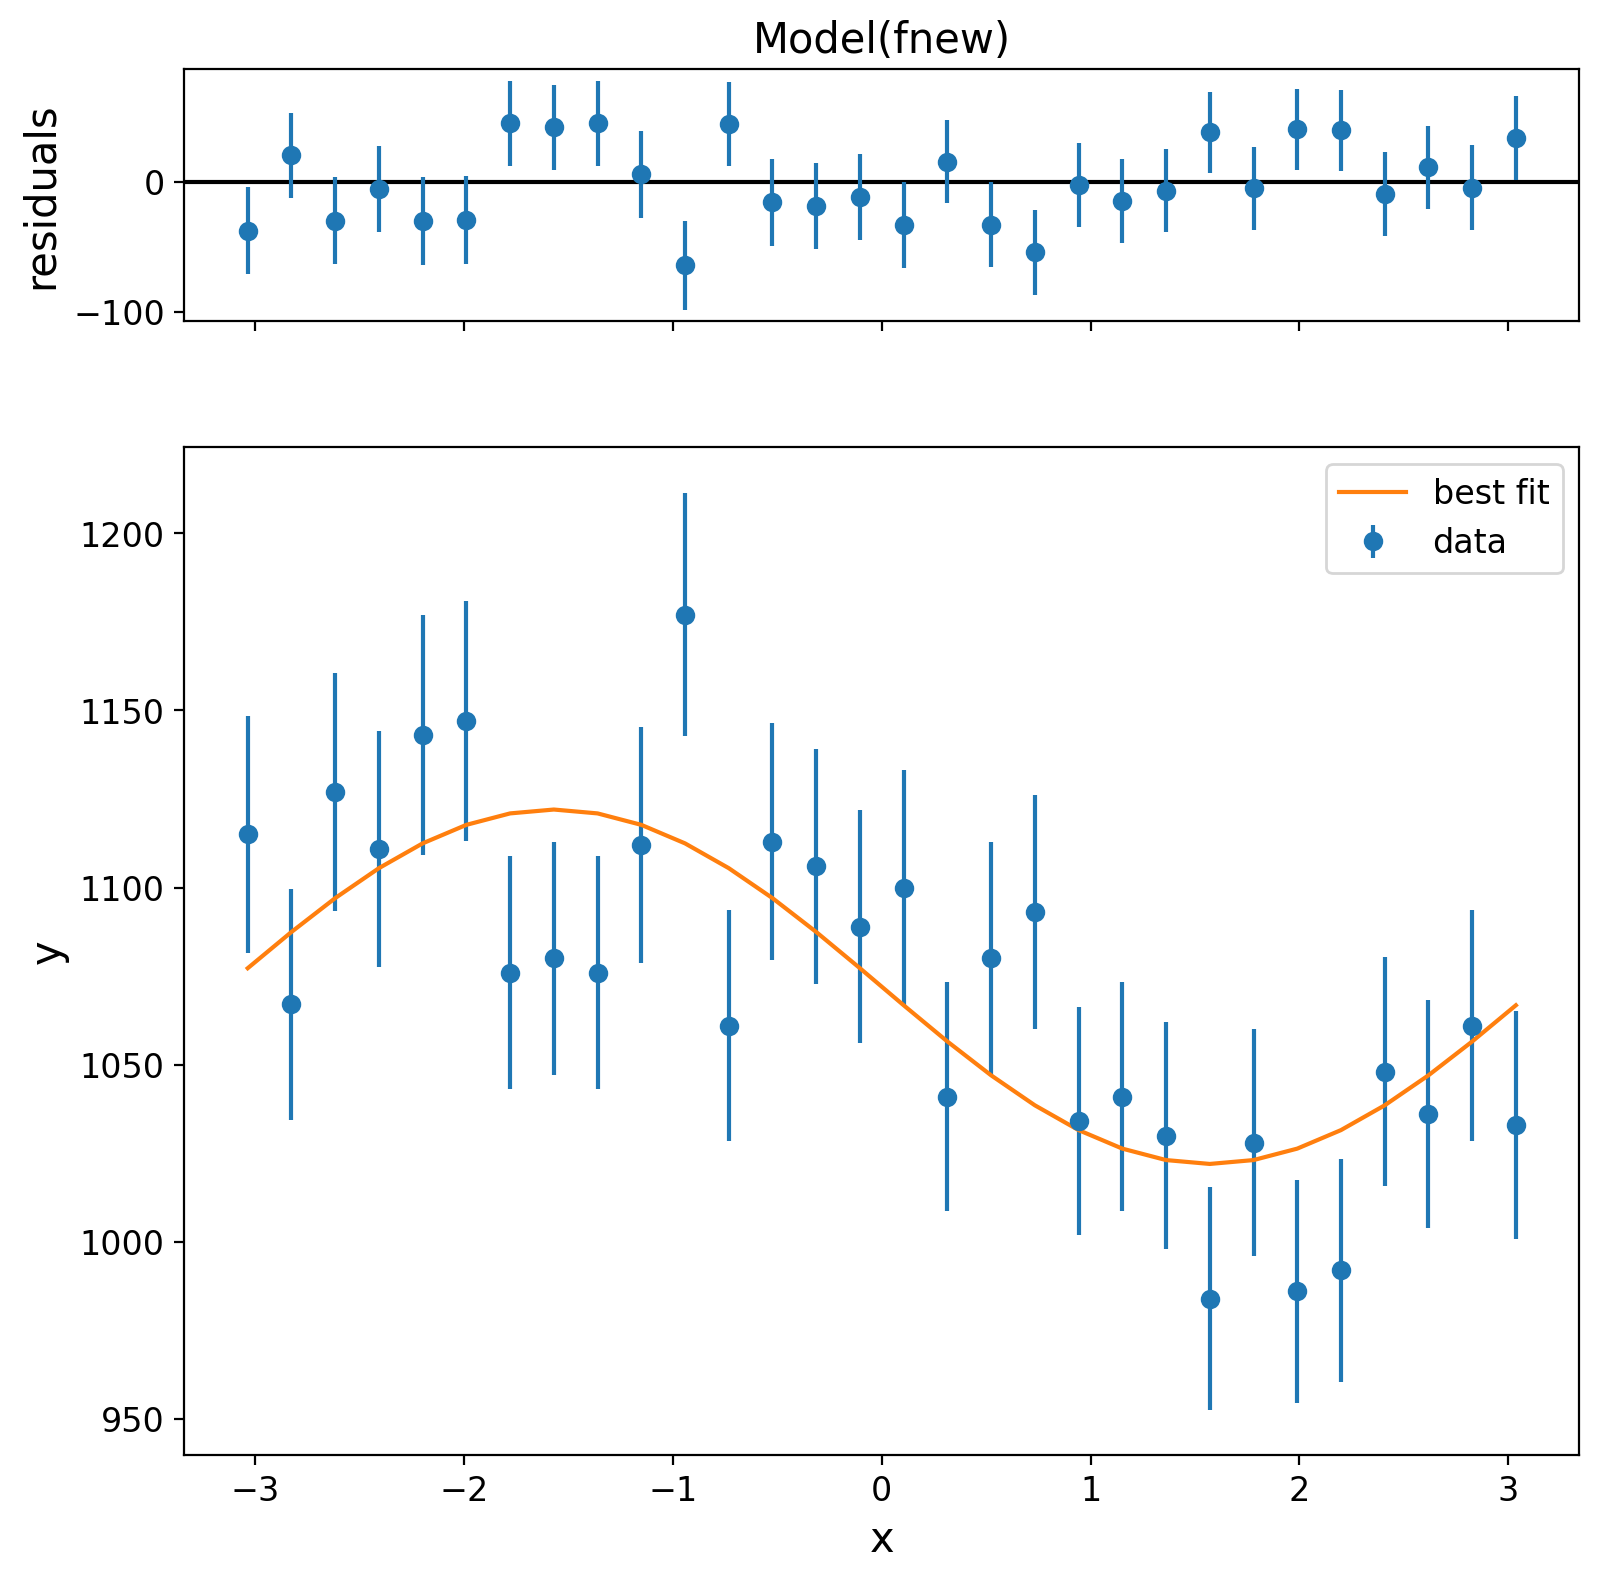

In [55]:
#>>>RUN: L7.1-runcell01

############ This is all code from a previous lesson
import numpy as np
import csv
import math
import lmfit
import matplotlib.pyplot as plt
from scipy import optimize as opt

def rad(iTheta):
    return iTheta/180. * math.pi

def rad1(iTheta):
    return iTheta/180. * math.pi-math.pi

def load(label):
    dec=np.array([])
    ra=np.array([])
    az=np.array([])
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile,delimiter=' ')
        for pRow in plots:
            if '#' in pRow[0] or pRow[0]=='':
                continue
            dec = np.append(dec,rad(float(pRow[2])))
            ra  = np.append(ra,rad1(float(pRow[3])))
            az  = np.append(az,rad(float(pRow[4])))
    return dec,ra,az

def prephist(iRA):
    y0, bin_edges = np.histogram(iRA, bins=30)
    x0 = 0.5*(bin_edges[1:] + bin_edges[:-1])
    y0 = y0.astype('float')
    return x0,y0,1./(y0**0.5)

label8='data/events_a8_1space.dat'

# Uncomment if using cloud runtime (which one?)
#label8='/content/drive/MyDrive/events_a8_1space.dat'
#label8='/content/events_a8_1space.dat'

dec,ra8,az=load(label8)
xhist,yhist,xweights=prephist(ra8)


########## Tlast fit code

def fnew(x,a,b):
    return a+b*np.sin(x)

model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=10)
result = model.fit(data=yhist,x=xhist, params=p, weights=xweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()


<h3> What is the $\chi^{2}$-value from a p-value? </h3>

So what is the importance of this fit? This is just equal to a $\chi^{2}$ distribution, as we ahve seen before. Before we delve into the details of the importance of the fit, lets just remind ourselves how to compute the p-value from a gaussian and the $\chi^{2}$ value from the p-value or a sigma value assuming a Gaussian. 


In [36]:
#>>>RUN: L7.1-runcell02

import scipy.stats as stats

sigma = 1
print(stats.norm.cdf(sigma)-stats.norm.cdf(-sigma))

def pval(iVal):
    return stats.norm.cdf(iVal)-stats.norm.cdf(-iVal)

def chi2Val(iGausSigma,iNDOF):
    val=stats.chi2.ppf(pval(iGausSigma),iNDOF)
    return val

print(chi2Val(sigma,2))

0.6826894921370859
2.295748928898636


<a name='exercises_7_1'></a>     

| [Top](#section_7_0) | [Restart Section](#section_7_1) | [Next Section](#section_7_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-7.1.1</span>

Compute the Chi-square value for 2 sigma and 2 degrees of freedom? Enter your answer as number with precision 1e-2. 


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


In [6]:
#>>>SOLUTION

import scipy.stats as stats

def pval(iVal):
    return stats.norm.cdf(iVal)-stats.norm.cdf(-iVal)

def chi2Val(iGausSigma,iNDOF):
    val=stats.chi2.ppf(pval(iGausSigma),iNDOF)
    return val

print(chi2Val(2,2))


6.180074306244173


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

$Χ^{2} = 6.18$

        
**EXPLANATION:**
    
Use the same function as explained in L7.1 lecture video. 
    
</div>


<a name='section_7_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L7.2 Minimizing on a Surface (1D Scan)</h2>  

| [Top](#section_7_0) | [Previous Section](#section_7_1) | [Exercises](#exercises_7_2) | [Next Section](#section_7_3) |


<h3>Overview</h3>

Now, what we are going to do is re-run the fit. Here we'll go through the $\chi^2$ minimization process semi manually, using `scipy.opt`. The code is explained in the lecture.

Strategically, what we are trying to do is write the $\chi^{2}$ value and use our normal minimizer tools to find the minimum parameters. 


In [56]:
#>>>RUN: L7.2-runcell01

#This is the new code
def chi2(iX): #iX is an array iX[0]=a and iX[1]=b
    '''Note that this function depends on xhist and yhist being defined already.
    This is bad practice in general, but we do it here for convenience.
    After all, this code isn't reused elsewhere.'''
    assert len(iX) == 2
    lTot=0
    for val in range(len(yhist)):
        xtest=fnew(xhist[val],iX[0],iX[1])
        lTot += (1./(1e-5+xtest))*(yhist[val]-xtest)**2
    return lTot

#First we minimize
x0 = np.array([1000,10]) # initial conditions
ps = [x0]
sol=opt.minimize(chi2, x0)
print(sol)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 26.77199746068118
        x: [ 1.073e+03 -5.046e+01]
      nit: 13
      jac: [-9.537e-07 -2.384e-07]
 hess_inv: [[ 1.740e+01 -4.916e-01]
            [-4.916e-01  3.602e+01]]
     nfev: 48
     njev: 16


Now, given that we have found the minimum, lets look at how the $\chi^{2}$ value changes from the minimum. The important thing is to remember that from [Wilk's Thereom](https://en.wikipedia.org/wiki/Wilks%27_theorem) the uncertainty of a parameter can be obtained by tkaing $\Delta \chi^{2}$ from the minimum of a value of 1. Lets go ahead and plot the minimum and look at what $\Delta \chi^{2}=1$ looks like. 

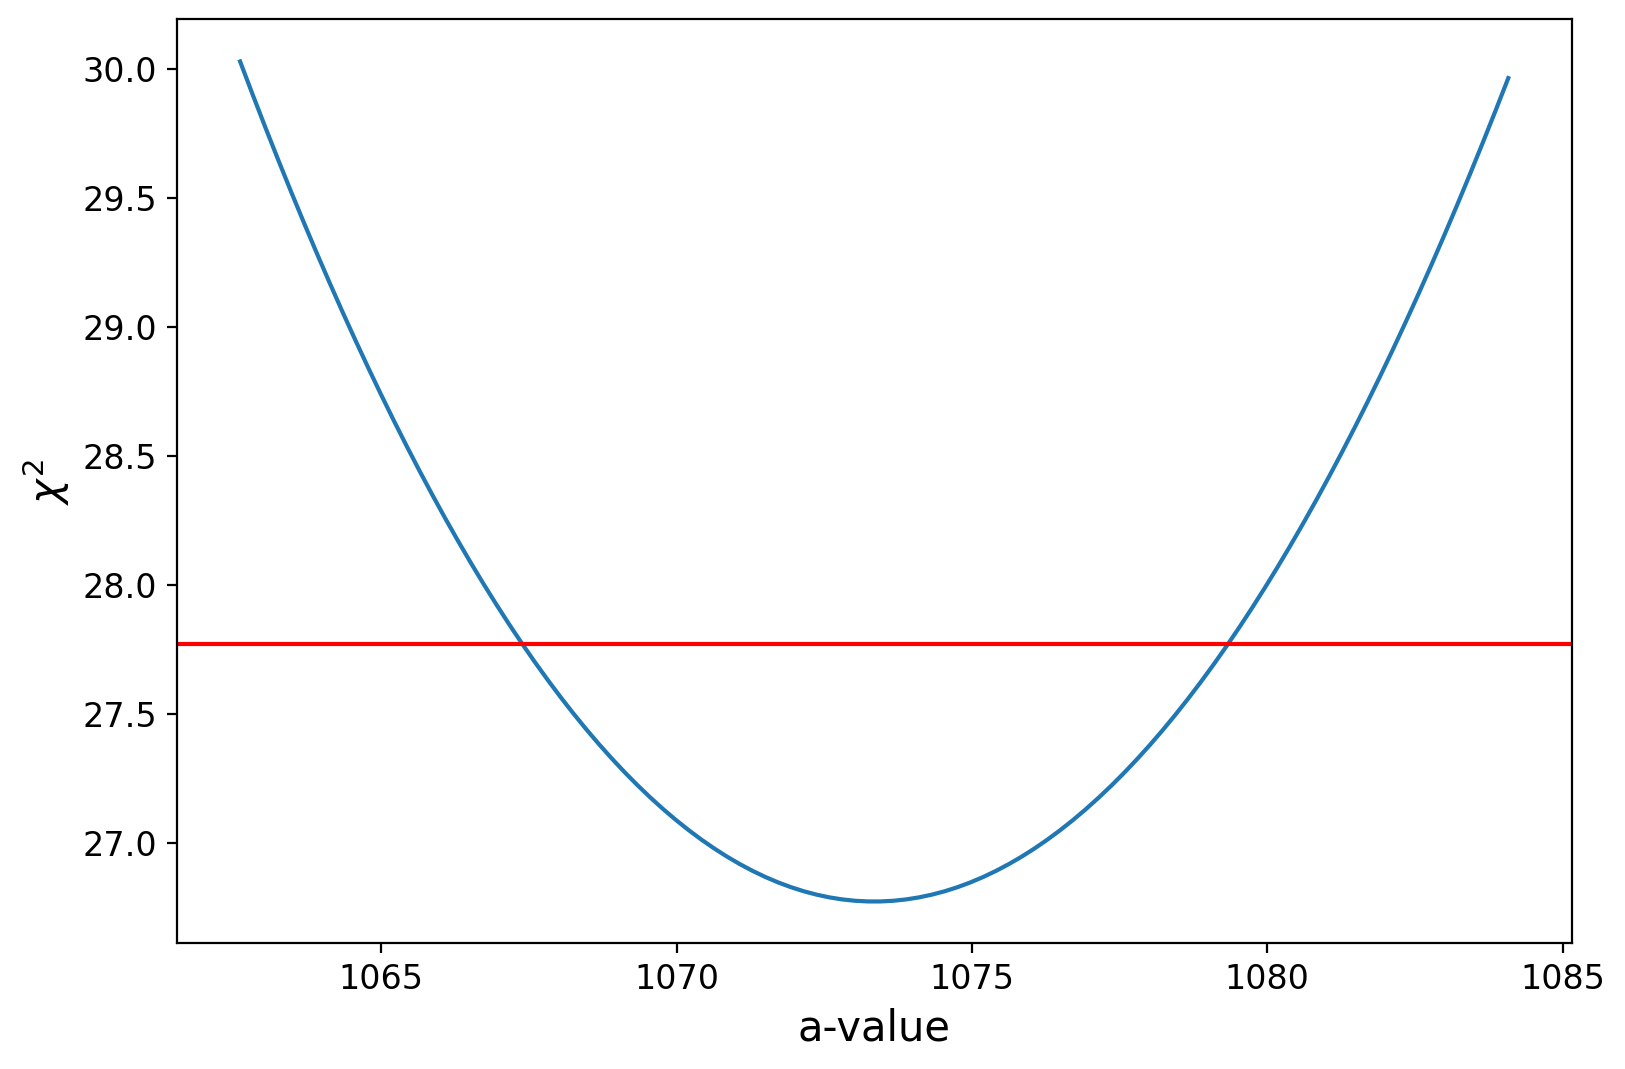

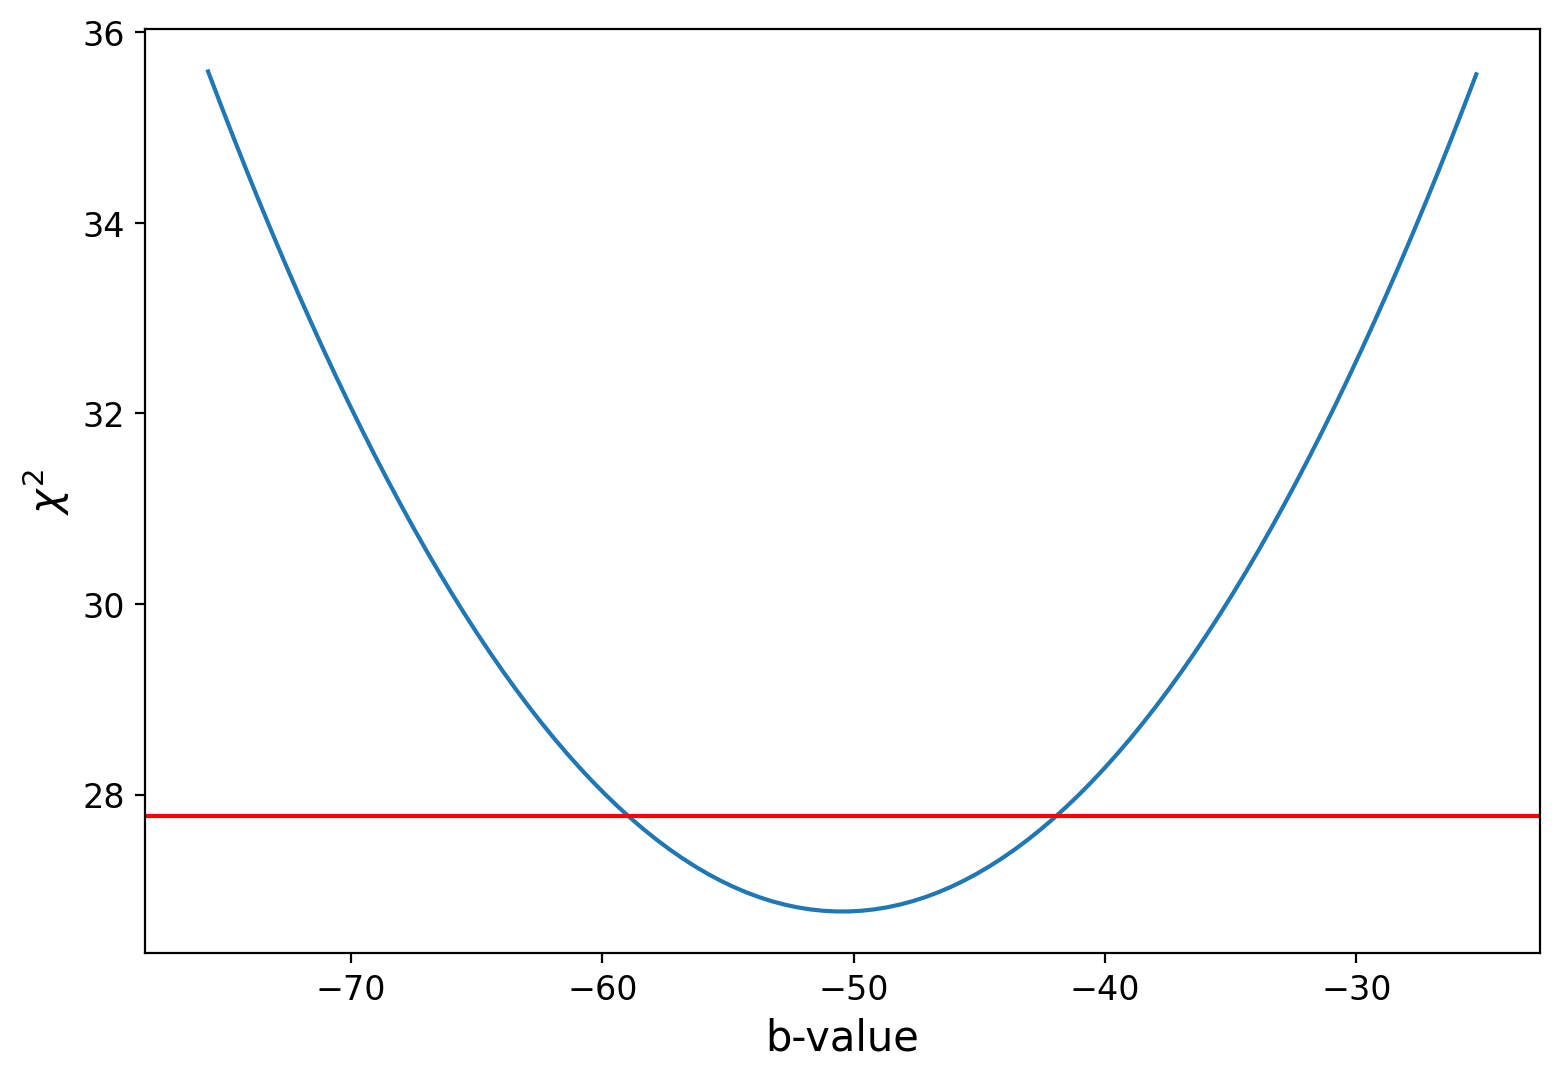

In [57]:
#>>>RUN: L7.2-runcell02

#Scan near the minimum of each value
x = np.linspace(sol.x[0]*0.99,sol.x[0]*1.01, 100)
y = np.linspace(sol.x[1]*0.5,sol.x[1]*1.5, 100)

#Now lets fix one parameter at the minimum, and profile the other
plt.plot(x, chi2([x,sol.x[1]]),label='chi2');
plt.axhline(sol.fun+1, c='red')
plt.xlabel("a-value")
plt.ylabel("$\chi^{2}$")
plt.show()

#Now for the other parameter
plt.plot(y, chi2([sol.x[0],y]),label='chi2');
plt.axhline(sol.fun+1, c='red')
plt.xlabel("b-value")
plt.ylabel("$\chi^{2}$")
plt.show()

Where the red and blue lines cross correspnods to the one $\sigma$ fluctation up and down from the minimum. As a result, we can code up this algorithm and compute the best fit and the uncertainty on the best fit parameter. Let's go ahead and code this up. 

In [58]:
######## Now lets use a numerical solver to find the points at which a function crosses zero (root solver)
def chi2minX(xval, delta_chi2=1):
    val=chi2([xval,sol.x[1]])
    minval=chi2(sol.x) + delta_chi2
    return val-minval

def chi2minY(yval, delta_chi2=1):
    val=chi2([sol.x[0],yval])
    minval=chi2(sol.x) + delta_chi2
    return val-minval

def chi2uncX(sol):
    solX1=opt.root_scalar(chi2minX,bracket=[sol.x[0], sol.x[0]*1.02],method='brentq')
    solX2=opt.root_scalar(chi2minX,bracket=[sol.x[0]*0.98, sol.x[0]],method='brentq')
    print("a:",sol.x[0],"+/-",abs(solX2.root-solX1.root)/2.)
    print("Reminder the Poisson uncertainty would be:",math.sqrt(np.mean(yhist)/(len(xhist))))
    return solX1, solX2

def chi2uncY(sol):
    solY1=opt.root_scalar(chi2minY,bracket=[sol.x[1],    sol.x[1]*1.2],method='brentq')
    solY2=opt.root_scalar(chi2minY,bracket=[sol.x[1]*0.8, sol.x[1]],method='brentq')
    print("b:",sol.x[1],"+/-",abs(solY2.root-solY1.root)/2.)
    return solY1, solY2

solX1, solX2 = chi2uncX(sol)
solY1, solY2 = chi2uncY(sol)

a: 1073.3461785709026 +/- 5.978245820876737
Reminder the Poisson uncertainty would be: 5.980245256955047
b: -50.46118430837864 +/- 8.505827339180374


So what have we done? 

We've used the optimizer to minimize the $\chi^{2}$ values in 2D (a,b), and we have obtained an uncertainty by looking at $\Delta \chi^{2}$. You can see that our semi manual manipulation got us to the same parameter estimates as the `lmfit` example. Additionally, by looking at slices of $\chi^{2}$ in each of the parameters we obtained the same uncertainties. 

As a small note our final fitted uncertainty is a little bit larger than the Poisson uncertainty. In fact for all fits there is a rule that our uncertainties on any parameter have to be larger than a certain number. This bound is known as the Cramér-Rao bound. I won't derive it or go into in detail, but the Cramér-Rao bound states.

$$
\begin{equation}
\mathrm{Var}(\theta|\hat{\theta}) \geq \frac{1}{\mathcal{I}(\theta)} \\
\mathcal{I}(\theta) = E_{p(X|\theta)}\left[-\frac{\partial^{2}}{\partial\theta^{2}}\log\left(p\left(x|\theta\right)\right)\right]
\end{equation}
$$

Where $\mathrm{Var}(\theta|\hat{\theta})$ is the variance on our fitted parameter and we call $\mathcal{I}(\theta)$ the [Fisher information](https://en.wikipedia.org/wiki/Fisher_information), which generalizes the variance over binomial sampled distributions and, in its simplest form, is equal the inverse of the variance of a binomial distribution, which in turn is the more precise description of a poisson distribution. Hence the fact that our uncertainty is larger than the Poisson uncertainty. While I don't want to go into this more, this result is powerful because it means that there is limit to when you should stop searching for a best fit. 

<a name='exercises_7_2'></a>     

| [Top](#section_7_0) | [Restart Section](#section_7_2) | [Next Section](#section_7_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-7.2.1</span>

What are the 2$\sigma$ bounds (that is, 95.45% confidence interval values) of $a$ and $b$ in the fit above? Enter your answer as a list of numbers number with precision 1 (the nearest whole number): `[a_lower, a_upper, b_lower, b_upper]`

In [48]:
#>>>EXERCISE

#For a given parameter, assume everything else is determined, so we're
# working with 1 degree of freedom.
# First, we want to know the chi-square value at which 2 standard deivations (95.45% of the probability)
# in the chi-square distribution is for values less extreme than that value.
ndof=1
pval=0.9545
val = stats.chi2.ppf(pval,ndof)
print("Delta Chi-square:", val)

def minXfunc(x):
    return chi2minX(x, delta_chi2=val)

def minYfunc(x):
    return chi2minY(x, delta_chi2=val)

def chi2unc(sol, sol_index, min_func, unc_prop_guess):
 #insert code here
 return valmin,valmax

a1, a2 = chi2unc(sol, 0, minXfunc, 0.08)
b1, b2 = chi2unc(sol, 1, minYfunc, 0.4)

print(f"a bounds: [{a1}, {a2}]")
print(f"b bounds: [{b1}, {b2}]")


Delta Chi-square: 4.000009775604388


NameError: name 'valmin' is not defined

In [49]:
#>>>SOLUTION

from scipy.optimize.zeros import RootResults
from scipy.optimize.optimize import OptimizeResult
from typing import Callable, Tuple

# For a given parameter, assume everything else is determined, so we're
# working with 1 degree of freedom.
# First, we want to know the chi-square value at which 95.45% of the probability
# in the chi-square distribution is for values less extreme than that value.
# We do this as before:
ndof=1
pval=0.9545
val = stats.chi2.ppf(pval,ndof)
print("Delta Chi-square:", val)

# Now, we independently perturb a or b from their minimized chi-square values
# until this Delta chi-square value is achieved, just like above.

def chi2unc(sol, sol_index, min_func, unc_prop_guess):
    '''Does what chi2uncX and chi2uncY above do, with unc_prop_guess defining the
    proportional size of search space (e.g. 0.2 in chi2uncY, or 0.02 in chi2uncX)
    However, returns the parameter values where the delta chi2 is reached'''
    solX1=opt.root_scalar(min_func, bracket=[sol.x[sol_index], sol.x[sol_index]*(1+unc_prop_guess)], method='brentq')
    solX2=opt.root_scalar(min_func, bracket=[sol.x[sol_index]*(1-unc_prop_guess), sol.x[sol_index]], method='brentq')
    return solX1.root, solX2.root

def minXfunc(x):
    return chi2minX(x, delta_chi2=val)

def minYfunc(x):
    return chi2minY(x, delta_chi2=val)

# Here we set our delta_chi2 to the value in question, and guess how far away
# the values of a and b will be to set unc_prop_guess (if not big enough, error)
# then let the optimizer find the corresponding a and b uncertainties
a1, a2 = chi2unc(sol, 0, minXfunc, 0.08)
b1, b2 = chi2unc(sol, 1, minYfunc, 0.4)

print(f"a bounds: [{a1}, {a2}]")
print(f"b bounds: [{b1}, {b2}]")



Delta Chi-square: 4.000009775604388
a bounds: [1085.369584130688, 1061.4562934485602]
b bounds: [-67.46198134856637, -33.44101670166678]


/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_98187/1060713805.py:3: DeprecationWarning: Please use `RootResults` from the `scipy.optimize` namespace, the `scipy.optimize.zeros` namespace is deprecated.
  from scipy.optimize.zeros import RootResults
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_98187/1060713805.py:4: DeprecationWarning: Please use `OptimizeResult` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  from scipy.optimize.optimize import OptimizeResult


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">


**SOLUTION:**

<pre>
a in roughly [1061, 1085] and b in roughly [-67, -33]
</pre>
        
**EXPLANATION:**
    
We've assumed all but one parameter is fully determined, so we have 1 degree of freedom. For sake of explanation, assume it's $a$.

We're looking for 2-sigma (95.45%) confidence interval bounds, that is, the values of $a$ for which $\Delta \chi^2$ is such that in a 1 DoF $\chi^2$ distribution, 95% of $\chi^2$ values are less extreme.
From the inverse of the CDF, we find this $\Delta \chi^2$ is 4.

Doing root finding to figure out how far we need to move $a$ or $b$ to achieve this increase in $\chi^2$, we find the values we're looking for.
    
</div>


<a name='section_7_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L7.3 Minimizing on a Surface (2D Scan)</h2>  

| [Top](#section_7_0) | [Previous Section](#section_7_2) | [Exercises](#exercises_7_3) | [Next Section](#section_7_4) |


Now given our minimization worked in 1D for both variables $a$ and $b$, what about if we scan both variables simultaneously and then look at how the minimum behaves. To do this, we can start by first scaning around the best fit values of $a$ and $b$ and just plotting the value of our $\chi^{2}$ minimization. From this space, we can start to relate this back to the 2D version of Wilk's theorem in the slides below. 

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L07/slides_L07_03.html" target="_blank">HERE</a>.

In [59]:
#>>>RUN: L7.3-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L07/slides_L07_03.html', width=970, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L07/slides_L07_03.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L07/slides_L07_03.html" width="900", height="550" frameBorder="0"/>
</p>

To really visualize the whole thing lets make one more plot: how the $\chi^2$ value depends on both parameters. We can do this using the `meshgrid` function and plotting it. In addition, we will add some color full lines for a $\Delta \chi^{2}$ given by various values, we will revisit what these values are in a little bit.   

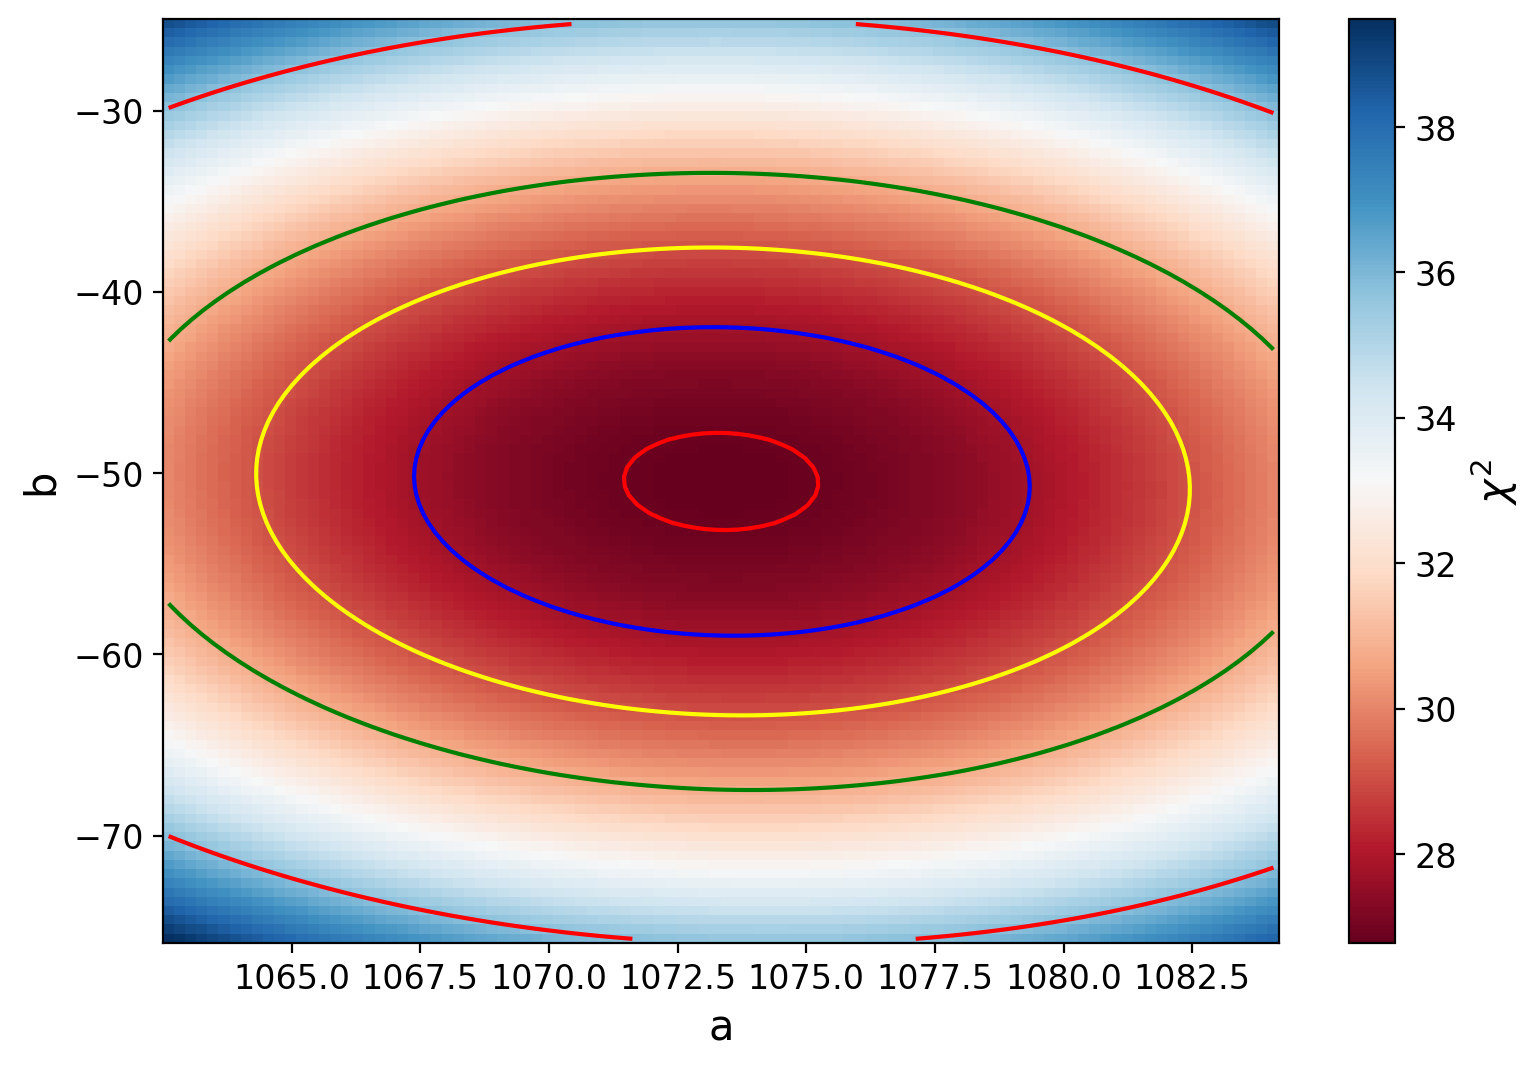

In [64]:
#>>>RUN: L7.3-runcell01

#define the 2D X and Y grid
x = np.linspace(sol.x[0]*0.99,sol.x[0]*1.01, 100) #grid in x
y = np.linspace(sol.x[1]*0.5,sol.x[1]*1.5, 100)#grid in y
X, Y = np.meshgrid(x, y) #2d grid

# For z coordinate, evaluate chi2 at each x,y point in the grid.
# note understanding this one-liner itself isn't too important
Z = np.array([chi2([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

#and plot
def plotColorsAndContours(X,Y,Z):
    fig, ax = plt.subplots(1, 1)
    c = ax.pcolor(X,Y,Z,cmap='RdBu')
    cb=fig.colorbar(c, ax=ax)
    plt.xlabel("a")
    plt.ylabel("b")
    cb.set_label("$\chi^{2}$")
    #Now lets plot the contours of Delta chi^2
    levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
    for i0 in range(len(levels)):
        levels[i0] = levels[i0]+sol.fun
    c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
    #plt.show()
    
plotColorsAndContours(X,Y,Z)

On the above we've plotted level curves representing different $\chi^2$ increases from the minimum. In the last section, we obtained uncertainties for our fit parameters by allowing just 1 varaible to vary, then observing the $\Delta\chi^2$. We may ask, what is the uncertainty profile when we are letting 2 float simultaneously?

Lets go back to our lecture slides' where we have the Taylor expansion result that led to the relation of Wilk's theorem. Now, we can write the expansion in terms of all variables $\vec{\theta}$:  

$$
\begin{equation}
\chi^{2}(x_{i},\vec{\theta})=\chi^{2}_{min}(x_{i},\vec{\theta})+\frac{1}{2}(\theta_{i}-\theta_{j})^{T}\frac{\partial^{2}}{\partial \theta_{i}\theta_{0}}\chi^{2}_{min}(x_{i},\vec{\theta}_{0})(\theta_{j}-\theta_{0})
\end{equation}
$$

We can write this out in 2D as:

$$
\begin{equation}
\chi^{2}(x,\vec{\theta})=\chi_{min}^{2}(x,\vec{\theta})+\frac{1}{2}\left(\begin{array}{cc}
\theta_{a}-\theta_{a-min} & \theta_{b}-\theta_{b-min}\end{array}\right)\left(\begin{array}{cc}
\frac{\partial^{2}\chi^{2}}{\partial\theta_{a}^{2}} & \frac{\partial^{2}\chi^{2}}{\partial\theta_{a}\partial\theta_{b}}\\
\frac{\partial^{2}\chi^{2}}{\partial\theta_{a}\partial\theta_{b}} & \frac{\partial^{2}\chi^{2}}{\partial\theta_{b}^{2}}
\end{array}\right)\left(\begin{array}{c}
\theta_{a}-\theta_{a-min}\\
\theta_{b}-\theta_{b-min}
\end{array}\right)
\end{equation}
$$

In the case where $\frac{\partial^{2}\chi^{2}}{\partial\theta_{a}\partial\theta_{b}}\approx0$ we can simplify this approximation a lot.

$$
\begin{equation}
\chi^{2}(x,\vec{\theta})=\chi_{min}^{2}(x,\vec{\theta})+\frac{1}{2}\left(\begin{array}{cc}
\Delta\theta_{a} & \Delta\theta_{b}\end{array}\right)\left(\begin{array}{cc}
\frac{\partial^{2}\chi^{2}}{\partial\theta_{a}^{2}} & 0\\
0 & \frac{\partial^{2}\chi^{2}}{\partial\theta_{b}^{2}}
\end{array}\right)\left(\begin{array}{c}
\Delta\theta_{a}\\
\Delta\theta_{b}
\end{array}\right)
\end{equation}
$$

This all becomes a 2D quadratic equation

$$
\begin{align*}
\chi^{2}(x,\vec{\theta}) & =\chi_{min}^{2}(x,\vec{\theta})+\frac{1}{2}\left(\begin{array}{cc}
\Delta\theta_{a}^{2}\frac{\partial^{2}\chi^{2}}{\partial\theta_{a}^{2}}+ & \Delta\theta_{b}^{2}\frac{\partial^{2}\chi^{2}}{\partial\theta_{b}^{2}}\end{array}\right)\\
 & =\chi_{min}^{2}(x,\vec{\theta})+\left(\begin{array}{cc}
\frac{\Delta\theta_{a}^{2}}{\sigma_{\theta_{a}}^{2}}+ & \frac{\Delta\theta_{b}^{2}}{\sigma_{\theta_{b}}^{2}}\end{array}\right)
\end{align*}
$$

I want to point out, we are now profiling two parameters at once in this 2D plot, which means the contribution to $\chi^{2}$ involves 2 degrees of freedom. You can see this from the above equation, since its the sum of 2 gaussian distributed variables with width $1$ and mean $0$. The 1 $\sigma$ confidence interval for 2 degrees of freedom is computed by taking $\Delta \chi^2(x,\nu=2)=x~\mathrm{where~}\mathrm{cdf}\left(\chi^{2}(x,2)=0.683\right)\approx2.3$. This is the yellow contour. Contrast this with the case of 1 $\sigma$ confidence on 1 degree of freedom, where $\Delta\chi^2 = 1$. 

Now, we can go one step further, and note that the above formula  $ a x^2 + b y^2 = c$ is just the form of an ellipse with a specific major and minor axis. As a result, we can define a 3D funciton given by 

$$ f(x,y) = \left(\frac{x-\bar{a}}{\sigma_{a}}\right)^{2} + \left(\frac{y-\bar{b}}{\sigma_{b}}\right)^{2} $$

Anyway, let's plot the ellipses and compare it to our minimum contours. 


/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_98187/100254598.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(2*sol.hess_inv))


[[5.89935277        nan]
 [       nan 8.48816107]]


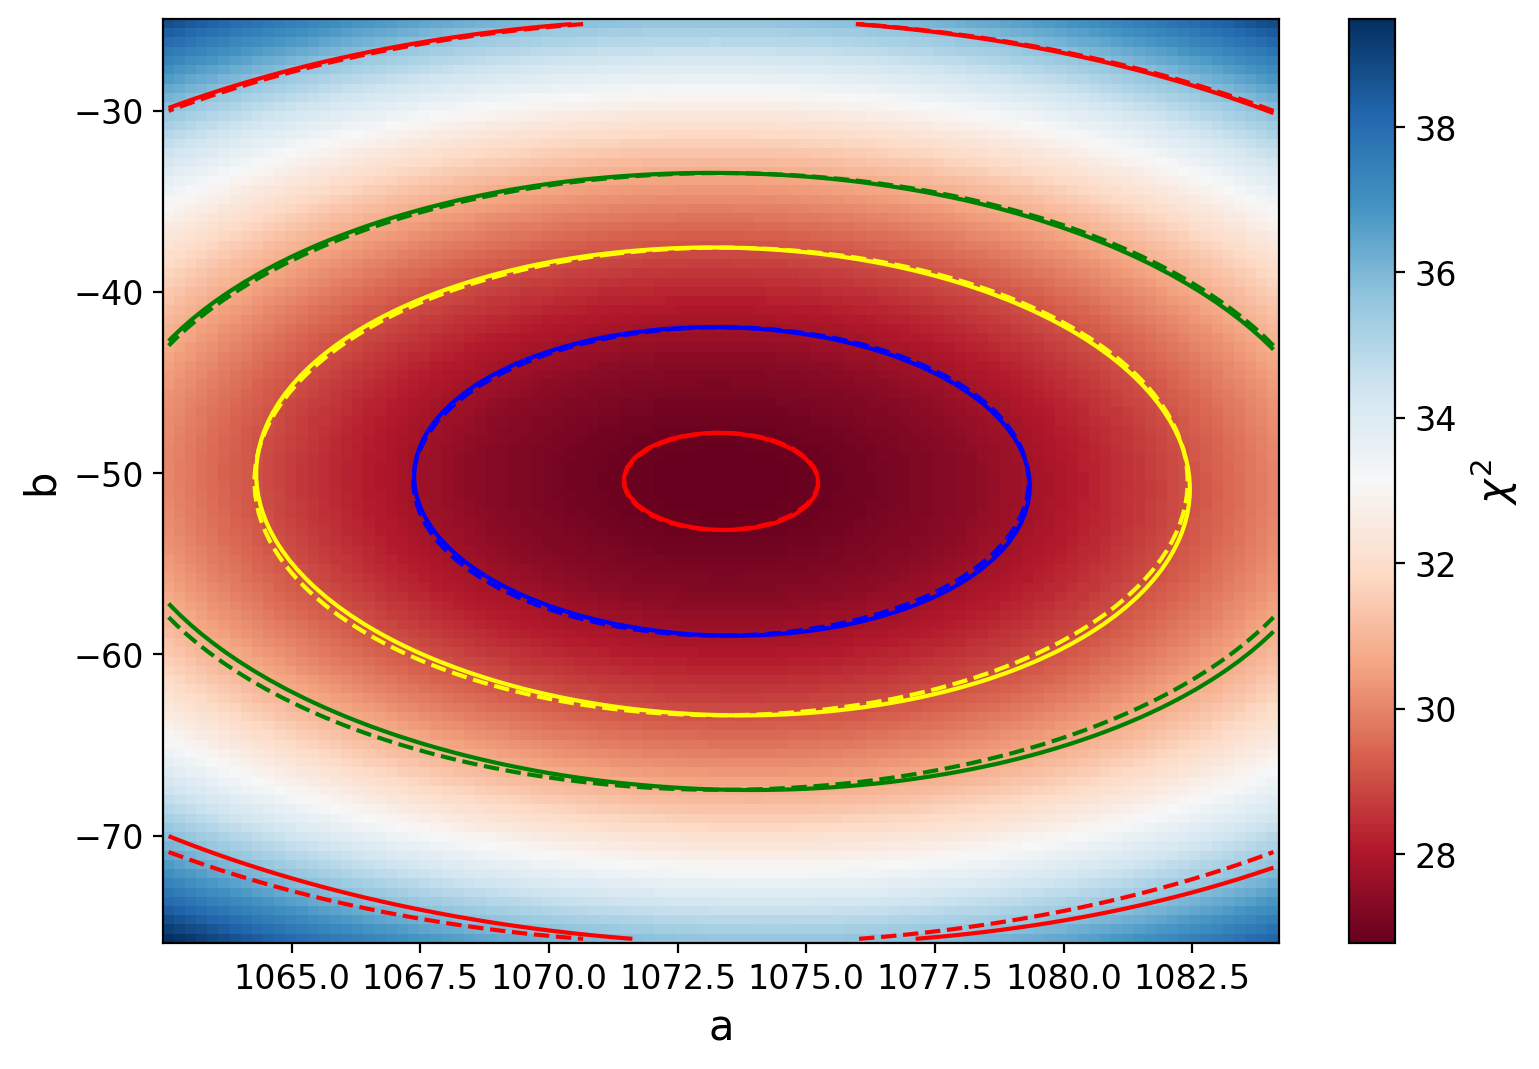

In [65]:
#>>>RUN: L7.3-runcell02

#Lets plot the uncertainties  from hess_inv
print(np.sqrt(2*sol.hess_inv))
#the diagonals are approximately the errors

#Make a the expression in the above equation x and x0 are 2 vectors
def quadratic2D(x,x0,sigma0):
    lVals=x-x0
    lVals=(lVals**2)/(sigma0)/sigma0
    return np.sum(lVals)

plotColorsAndContours(X,Y,Z)

#Now plot the ellipse in 3D
def plotEllipse(sigx,sigy):
    levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
    ZQ = np.array([quadratic2D([x,y],sol.x,[sigx,sigy]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
    c = plt.contour(X, Y, ZQ, levels,colors=['red', 'blue', 'yellow','green'],linestyles='dashed')

sigx=(solX2.root-solX1.root)/2.
sigy=(solY2.root-solY1.root)/2.
plotEllipse(sigx,sigy)
plt.show()

Remarkably, our space, give by the formula above, yields the solid lines, which matches very closely to the dashed contours obtained by just writing the $\chi^{2}$ value. This is a profound statement, it really is. 

Alright, since this gives us the same yellow line for our 2-variable 1$\sigma$ confidence ellipse. If you look close you do see a difference. This makes us beg the question of what happens when $\frac{\partial^{2}\chi^{2}}{\partial \theta_{a}\theta_{b}}\neq0$. We'll see soon, when we look at correlations on fitting a different set of parameters.

<a name='exercises_7_3'></a>     

| [Top](#section_7_0) | [Restart Section](#section_7_3) | [Next Section](#section_7_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-7.3.1</span>

When we allow 2 parameters to vary, for a given confidence level (e.g. 1$\sigma$) we end up with a confidence ellipse containing parameter values outside the confidence intervals on the individual parameters alone. Compute the 1$\sigma$ (68.27%) confidence interval bounds for the parameter $a$, based on this ellipse from floating both $a$ and $b$. Enter your answer as a list of number with precision 1 (nearest whole number): `[a_lower, a_upper]`

Why do we typically quote the uncertainty from the 1D variation?


In [70]:
#>>>EXERCISE
# We can follow the same procedure for finding the confidence interval based on 1D
# but for 1-sigma we now use 2.3 
# Use the code from the solution to Ex. 7.2.1,
ndof=insert value here
pval=0.6827#1 sigma p-value
val = stats.chi2.ppf(pval,ndof) # 2 DoF this time!
print("Delta Chi-square:", val)

def minfunc(x):
    return chi2minX(x, delta_chi2=val)

print(f"a bounds: [{a1}, {a2}]")


SyntaxError: invalid syntax (3112234227.py, line 5)

In [66]:
#>>>SOLUTION

# We can follow the same procedure for finding the confidence interval based on 1D
# but for 1-sigma we now use 2.3 instead of 1 for delta chi^2, since we have 2 DoF.
# Using the code from the solution to Ex. 7.2.1,
val = stats.chi2.ppf(0.6827,2) # 2 DoF this time!
print("Delta Chi-square:", val)

def minfunc(x):
    return chi2minX(x, delta_chi2=val)

a1, a2 = chi2unc(sol, 0, minfunc, 0.2)

print(f"a bounds: [{a1}, {a2}]")


Delta Chi-square: 2.2958151607859736
a bounds: [1082.4427567559844, 1064.326252242596]


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
a in roughly [1064, 1082]
</pre>
        
**EXPLANATION:**
    
Here we find the estimate on $a$ to have uncertainty around $\pm 9$, as opposed to around $\pm 6$ when we had only $a$ vary. For consistency, we usually quote the uncertainty on just one variable at a time.
    
</div>


<a name='section_7_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L7.4 Correlations Between Fit Parameters: Part 1</h2>  

| [Top](#section_7_0) | [Previous Section](#section_7_3) | [Exercises](#exercises_7_4) | [Next Section](#section_7_5) |


Ok, so now lets try to understand what happens when our off diagonal terms are off. Let's go back to Wilk's theorem and look at the Hessian for the $\chi^{2}$, but now with non-zero off-diagonal parameters. 

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L07/slides_L07_04.html" target="_blank">HERE</a>.

In [15]:
#>>>RUN: L7.4-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L07/slides_L07_04.html', width=970, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L07/slides_L07_04.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L07/slides_L07_04.html" width="900", height="550" frameBorder="0"/>
</p>

To understand the point of this, what we are going to do is make the 2D contour plot like the one above with the same contours as before, but now we will use a new function, that is just a reparametrization of the old one. This function will be

$$
\begin{equation}
 f(x) = a x + b (1-x)
\end{equation}
$$

This means that the values of $a$ and $b$ now have different meaning, but this is just a linear fit like before and it should give the same overall $\chi^{2}$ value as before. 


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 30
    # variables        = 2
    chi-square         = 29.8718324
    reduced chi-square = 1.06685116
    Akaike info crit   = 3.87155779
    Bayesian info crit = 6.67395255
    R-squared          = 0.99955039
[[Variables]]
    a:  1053.22719 +/- 6.95345275 (0.66%) (init = 1000)
    b:  1071.90427 +/- 6.17403792 (0.58%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = 0.872


<Figure size 900x600 with 0 Axes>

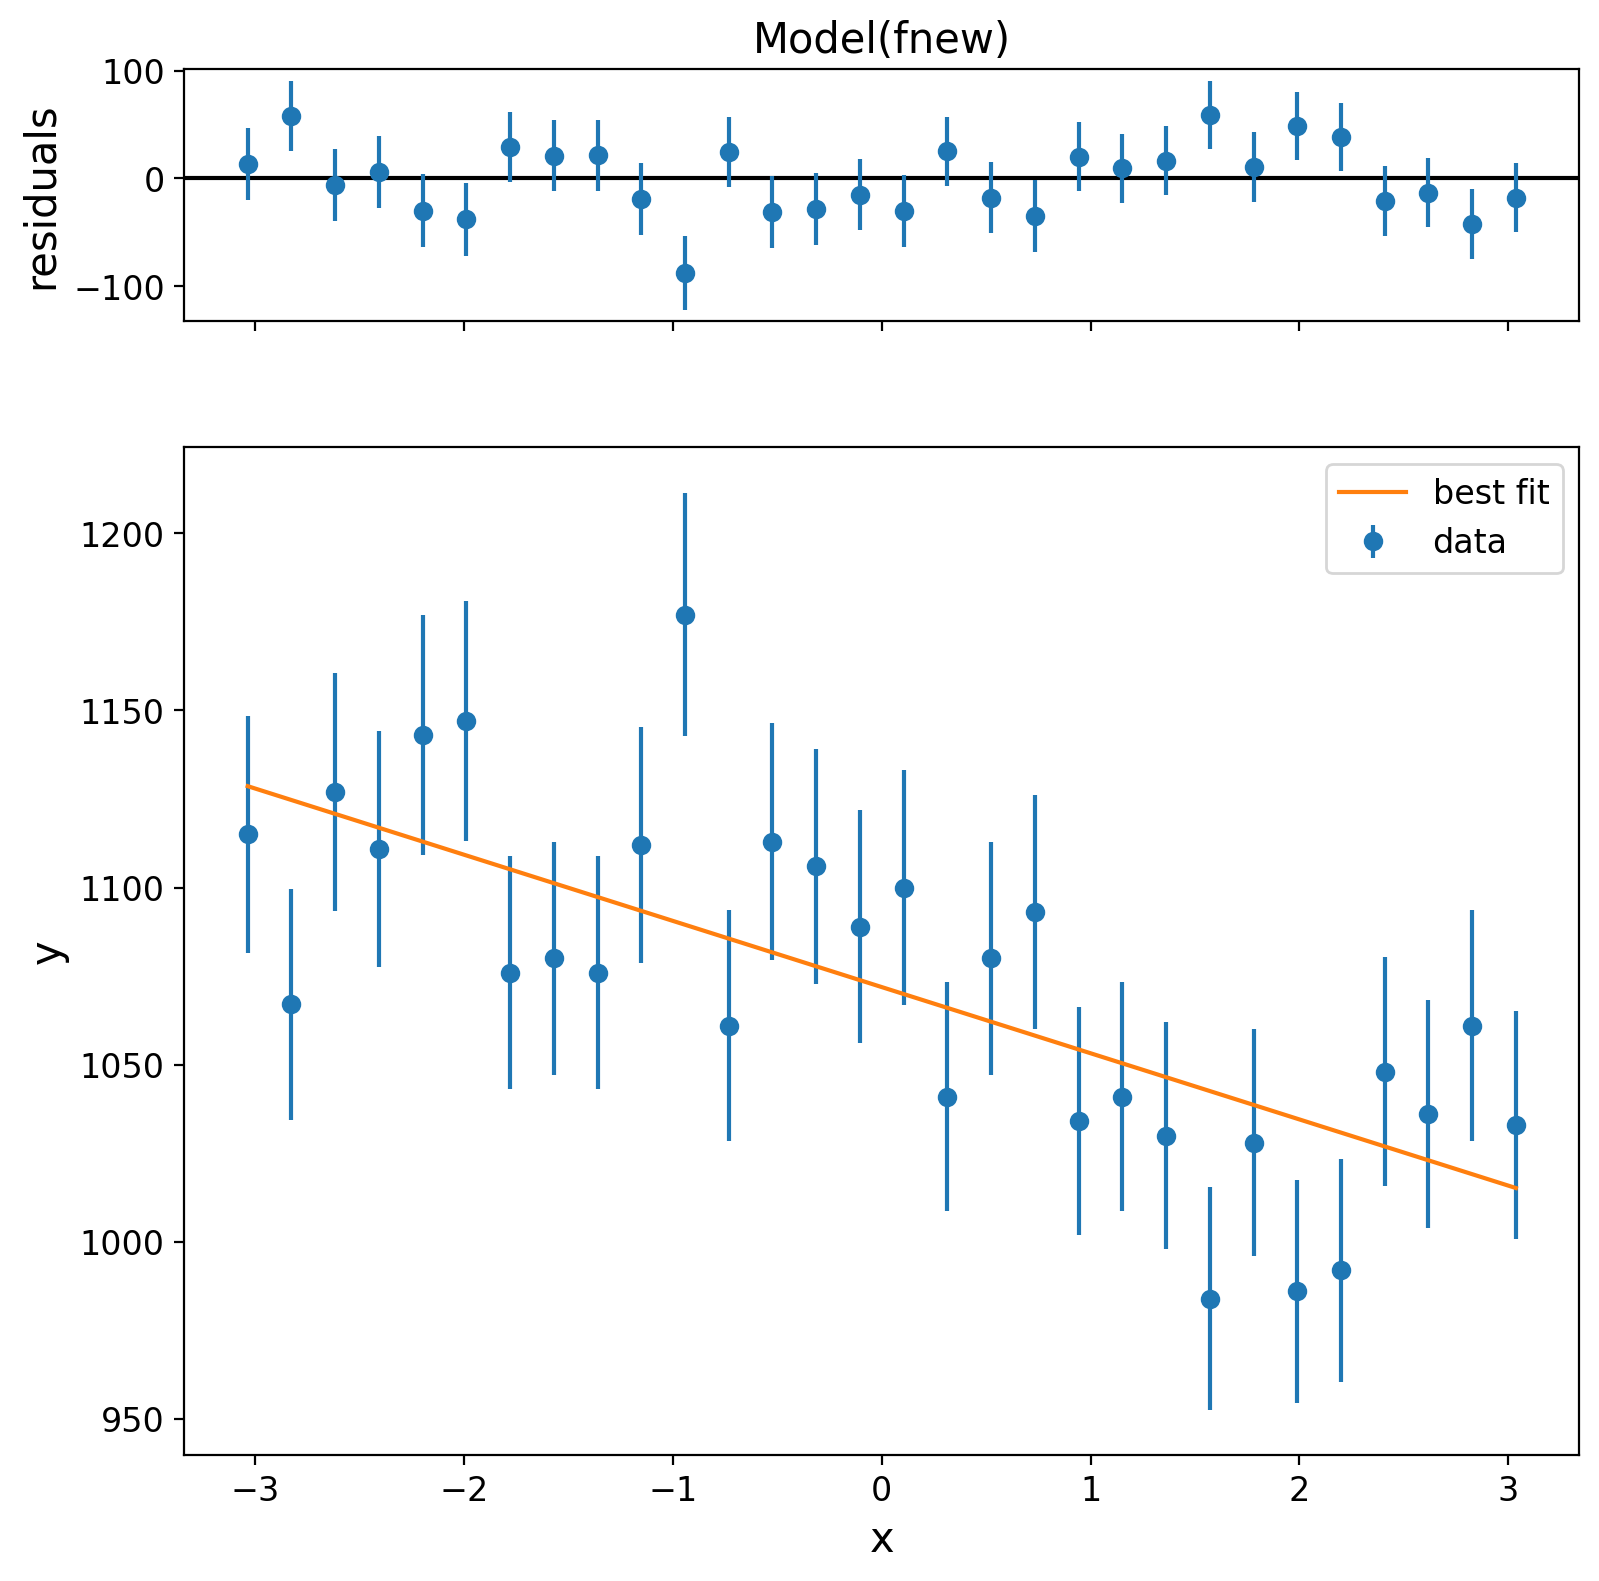

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 29.99034114793068
        x: [ 1.055e+03  1.073e+03]
      nit: 13
      jac: [ 8.821e-06 -9.775e-06]
 hess_inv: [[ 2.256e+01  1.733e+01]
            [ 1.733e+01  1.752e+01]]
     nfev: 45
     njev: 15


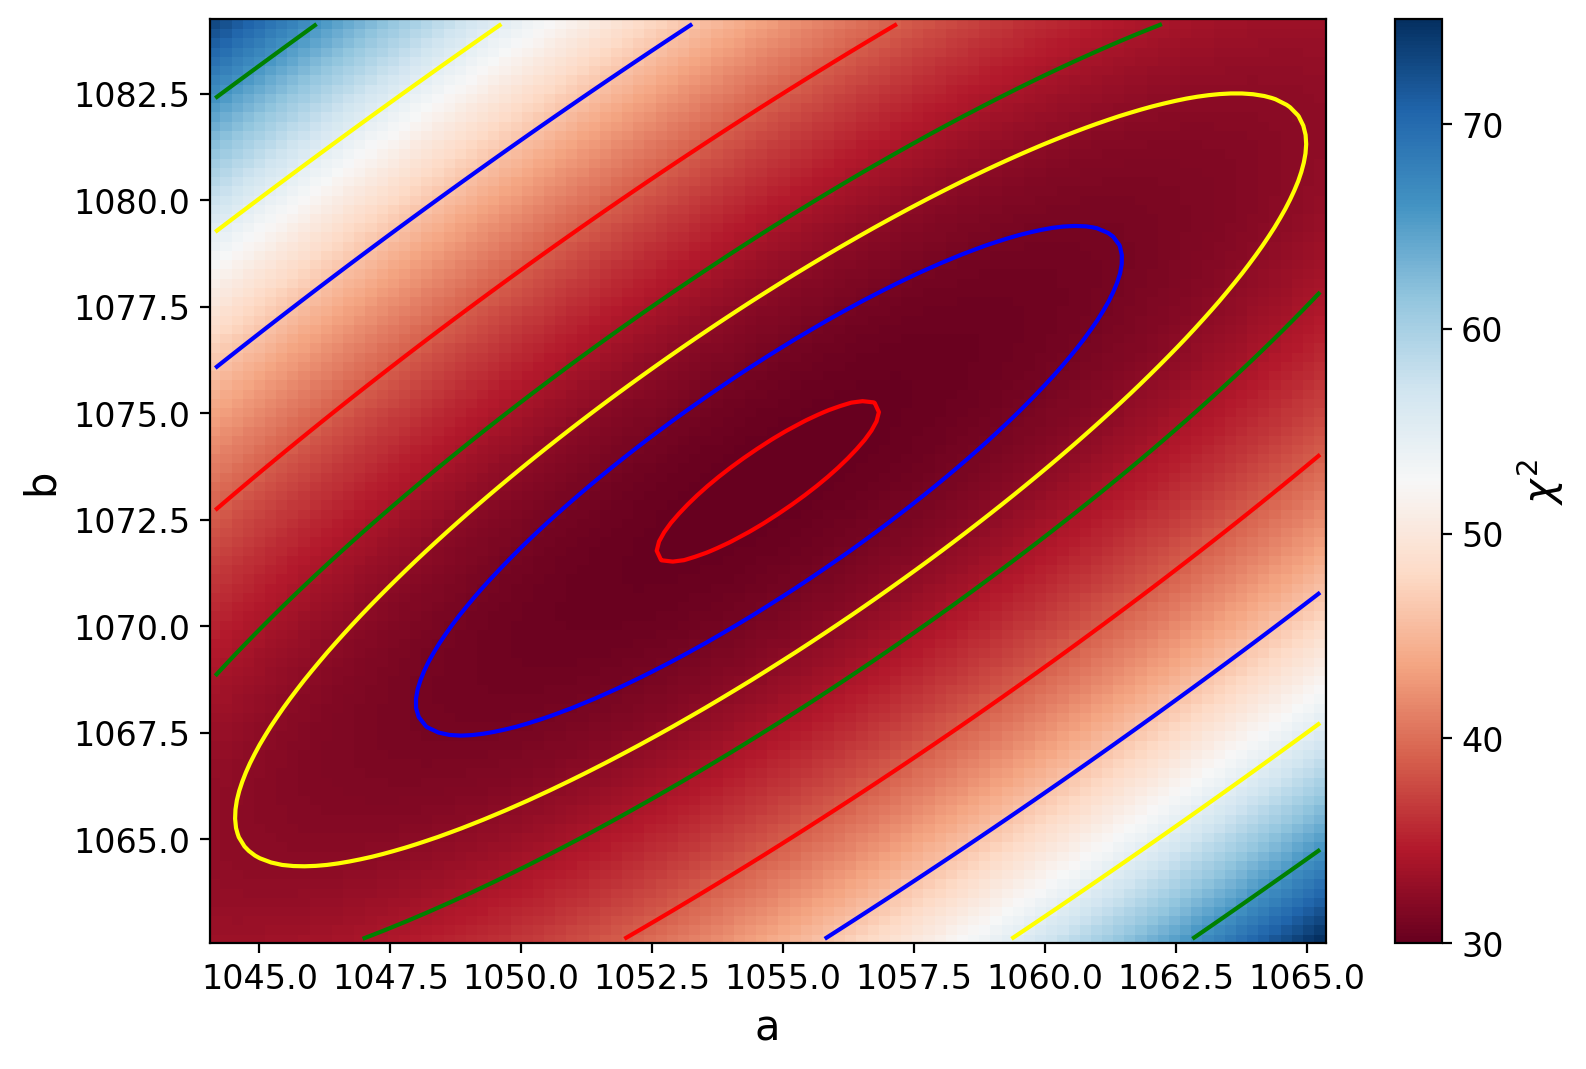

In [71]:
#>>>RUN: L7.4-runcell01

def fnew(x,a,b):
    pVal=b*(1-x)
    return a*x+pVal

model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=1000)

result = model.fit(data=yhist,x=xhist, params=p, weights=xweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()

x0 = np.array([1000,1000])
ps = [x0]
sol=opt.minimize(chi2, x0)
print(sol)

x = np.linspace(sol.x[0]*0.99,sol.x[0]*1.01, 100)
y = np.linspace(sol.x[1]*0.99,sol.x[1]*1.01, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([chi2([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
plotColorsAndContours(X,Y,Z)
plt.show()

Now, critically lets now make the same ellipse plot with our new best fit values for $a$ and $b$, an dour new uncertainties. Additionally, we can also do the 1D uncertainty scans like we did above again, to see how what uncertainties we get on $a$ and $b$. 

a: 1054.7031439856498 +/- 3.305487119661393
Reminder the Poisson uncertainty would be: 5.980245256955047
b: 1073.39984668383 +/- 2.932220772191272


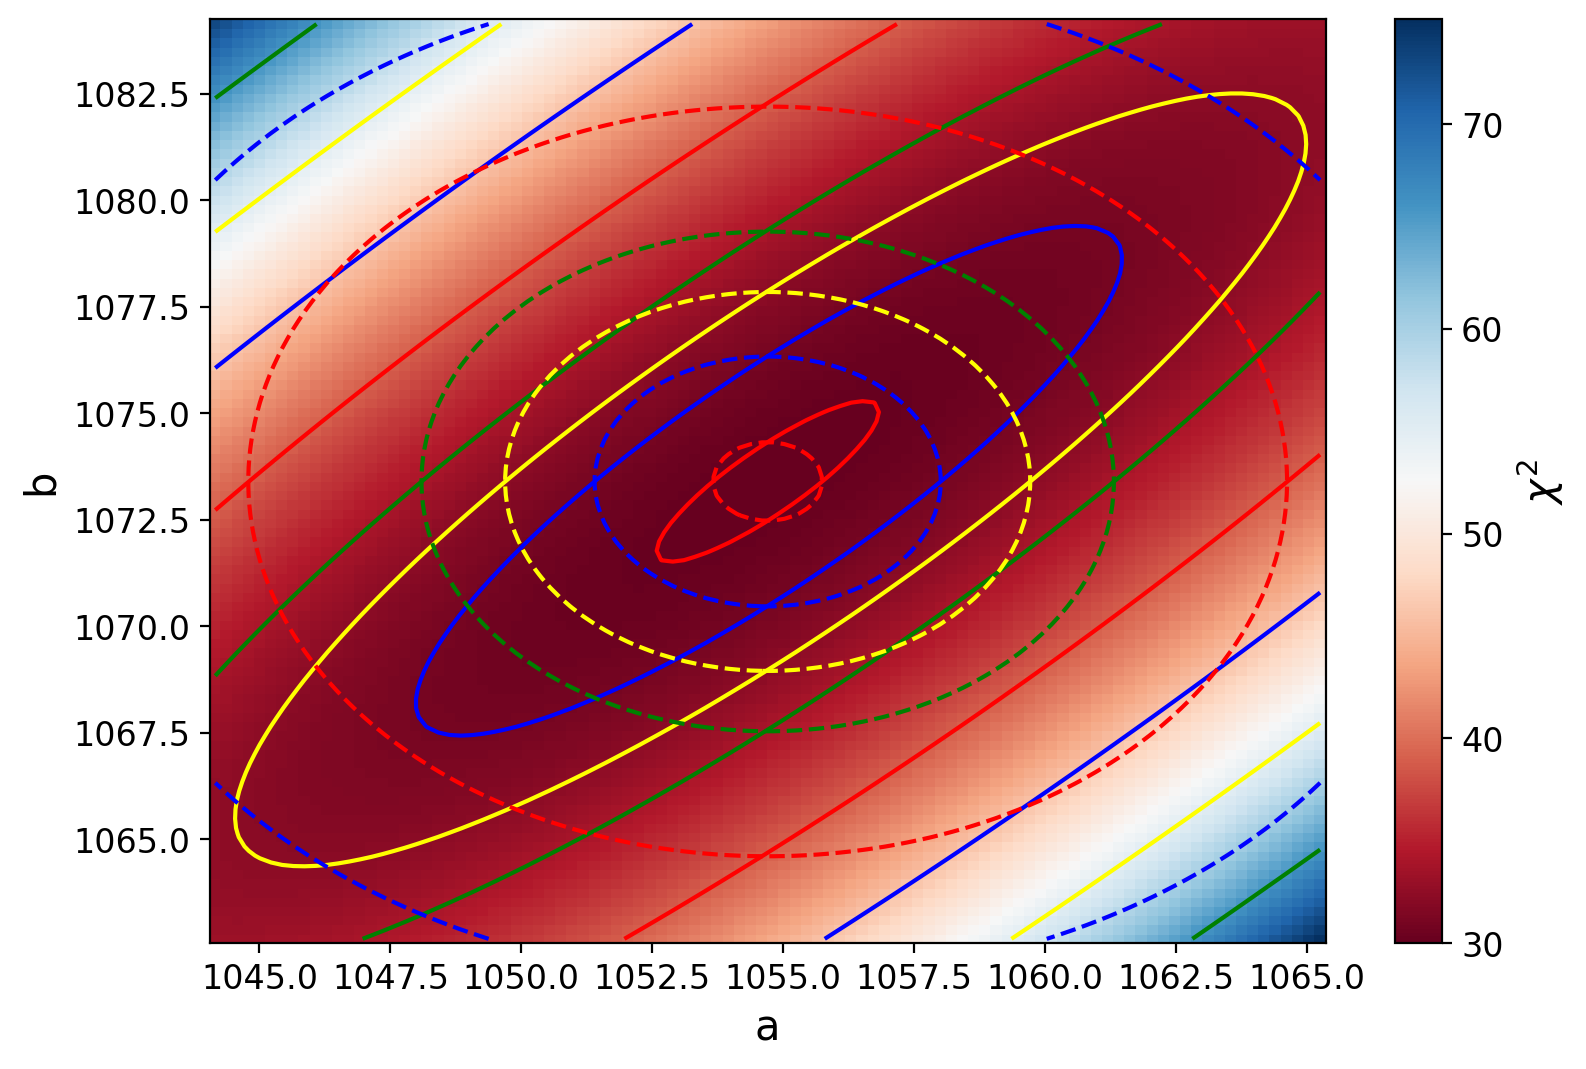

In [72]:
plotColorsAndContours(X,Y,Z)
solX1, solX2 = chi2uncX(sol)
solY1, solY2 = chi2uncY(sol)
sigx=(solX2.root-solX1.root)/2.
sigy=(solY2.root-solY1.root)/2.
plotEllipse(sigx,sigy)
plt.show()


What we can see is that our ellipse differ pretty dramatically from above. Also, we see that our 1D uncertainties are very mis-estimated from what lmfit gives us. The reason for this is that `lmfit` takes into account the full correlation of the variables. Whereas just doing a 1D scan is equivalent to just moving on a single line along the $y$ and $x$ axes. 

<a name='exercises_7_4'></a>     

| [Top](#section_7_0) | [Restart Section](#section_7_4) | [Next Section](#section_7_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-7.4.1</span>

Run the above fit with just a regular linear fit given by $f(x) = ax + b$. How does the $\chi^{2}$ change? How do the correlations between the variables change? 


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.



[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 30
    # variables        = 2
    chi-square         = 29.8718324
    reduced chi-square = 1.06685116
    Akaike info crit   = 3.87155779
    Bayesian info crit = 6.67395255
    R-squared          = 0.99955039
[[Variables]]
    a:  18.6770797 +/- 3.40002041 (18.20%) (init = 1000)
    b:  1071.90427 +/- 6.17403785 (0.58%) (init = 0)


<Figure size 900x600 with 0 Axes>

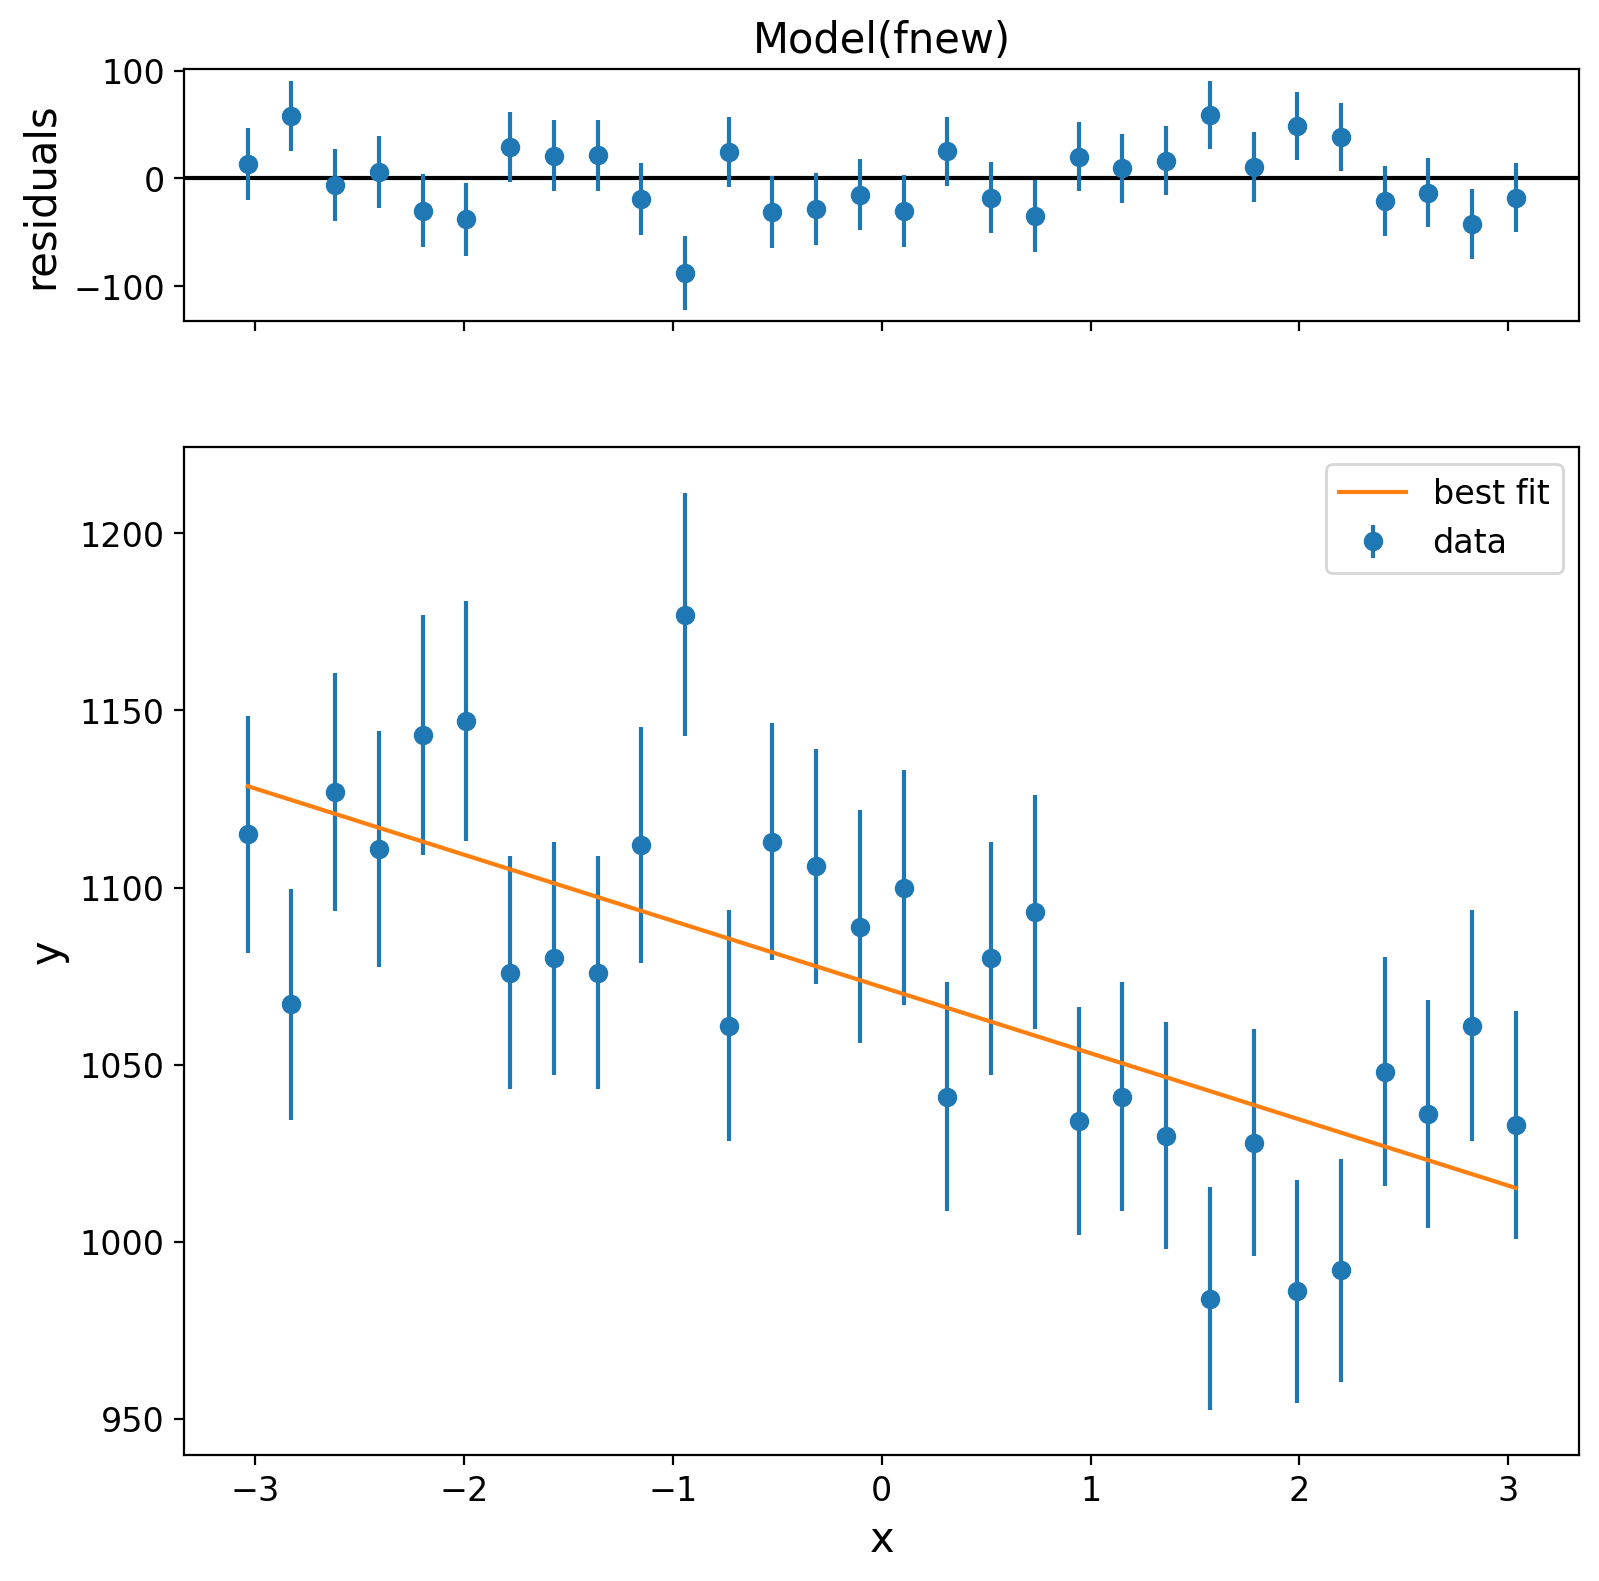

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 29.990341147710982
        x: [ 1.870e+01  1.073e+03]
      nit: 13
      jac: [-5.484e-06  0.000e+00]
 hess_inv: [[ 5.395e+00  2.016e-01]
            [ 2.016e-01  1.761e+01]]
     nfev: 45
     njev: 15


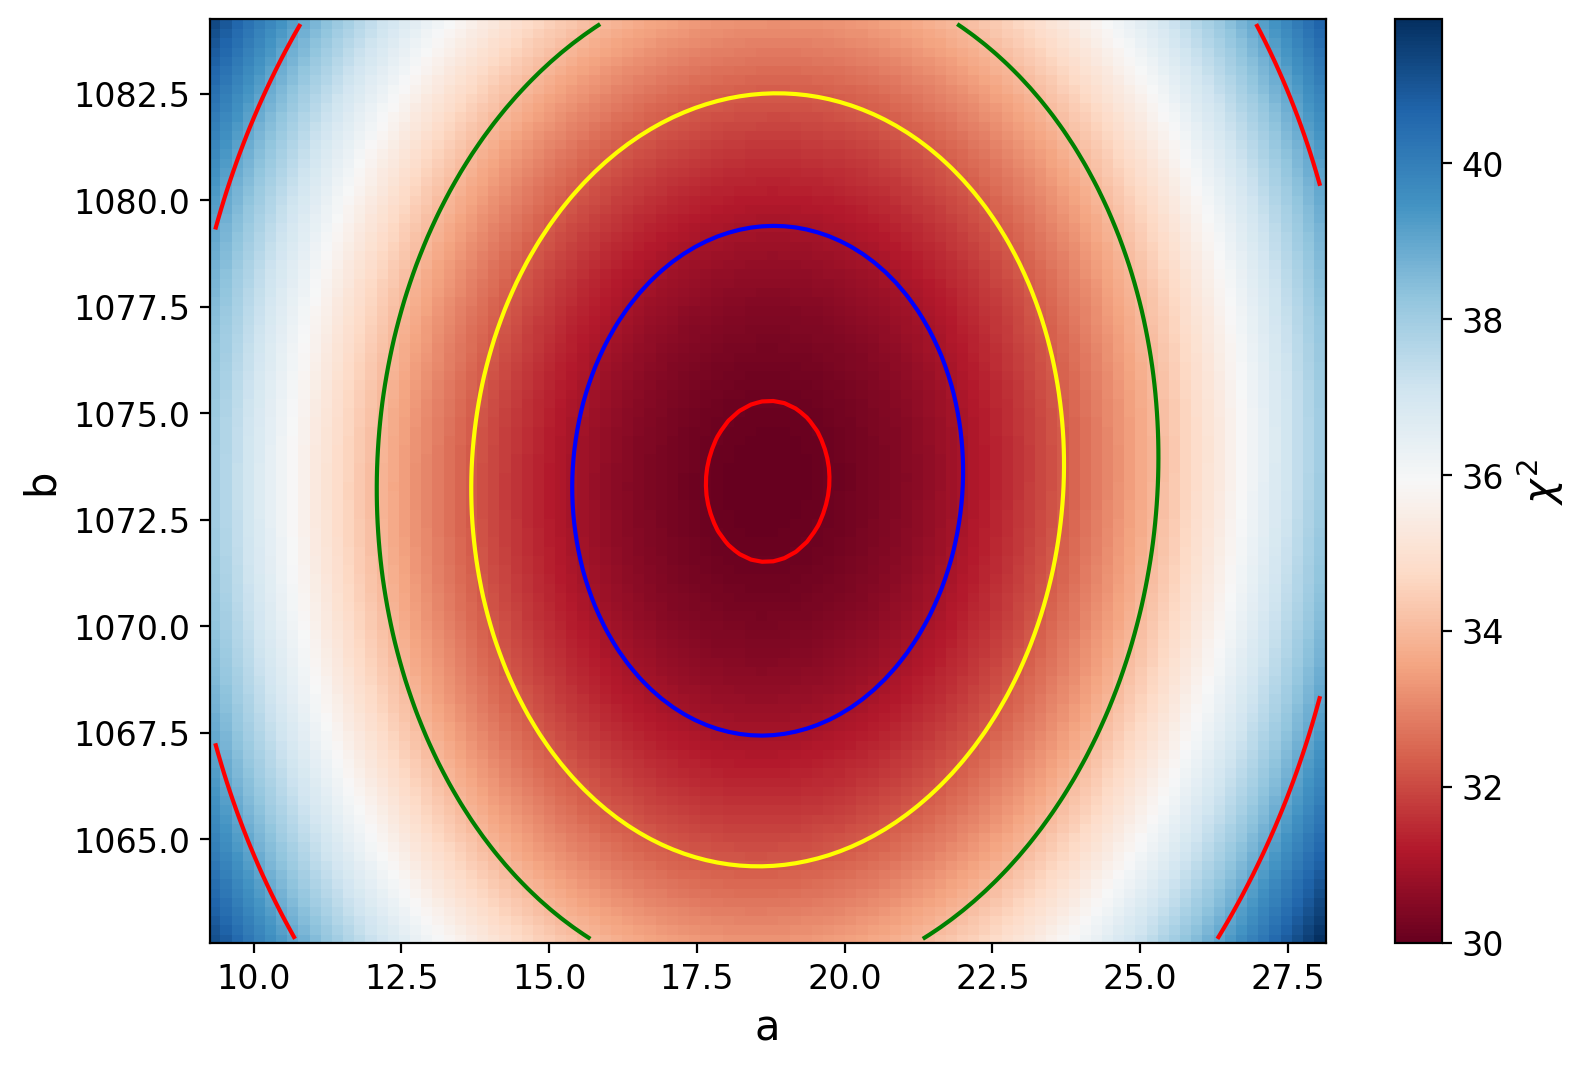

In [23]:
#>>>SOLUTION

def fnew(x,a,b):
    pVal=b
    return -1*a*x+pVal

model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=0)
result = model.fit(data=yhist,x=xhist, params=p, weights=xweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()

x0 = np.array([-20,1000])
ps = [x0]
sol=opt.minimize(chi2, x0)
print(sol)

x = np.linspace(sol.x[0]*0.5,sol.x[0]*1.5, 100)
y = np.linspace(sol.x[1]*0.99,sol.x[1]*1.01, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([chi2([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
plotColorsAndContours(X,Y,Z)
plt.show()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
$\chi^{2}$ is to within numerical variations the same. The correlation goes down to almost zero. 

</pre>
        
**EXPLANATION:**
    
By reparametrizing the fit, we ahve allowed the function to be equally as expressive as the above funciton. However, we have changed the roles of $a$ and $b$ in the fit. With this new fit $b$ is in charge of getting the overall scale and $a$ is in charge of getting the trend over $\theta$. Before we had both parameters were in charge of both scale and a combination of slope. Overall our fit has the same shape in the end, but the meaning of $a$ and $b$ is quite different and hence, the off-diagonal terms don't play a big role here. 
    
</div>


<a name='section_7_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L7.5 Correlations Between Fit Parameters: Part 2</h2>     

| [Top](#section_7_0) | [Previous Section](#section_7_4) | [Exercises](#exercises_7_5) |


Now if we go back to our original correlated parameterization, we see that the 1D profile method for obtaining the uncertianties is not the same as the uncertainties we get from the fit.  This is clearly a problem, how can we address this issue? 

<h3>Dealing with Correlated uncertainties</h3>

Looking at our parameters, our uncertainty estimate is smaller than what we observed above. The uncertainties quoted now differ from what we got by varying from the $\chi^{2}$ minimum. What we are doing is moving up and down the 2D plot and looking at $\Delta \chi^{2}$. However, given the parameters are strongly correlated, you see that this doesn't capture the true uncertainty in the sense that we can still move further along $x$ and $y$ and still be within the yellow or even blue ellipse. It's quite clear when you overlay the uncertainty from the quadratic function, which draws circles not ellipses. 

What, then, is the right uncertainty? 

Notice our fit with `lmfit` outputs a parameter $C(a,b)=0.872$. This is in fact the correlation between the parameters of $a$ and $b$. We also see from our optimization function that we get something labelled as the `hess_inv`. This we can write noting the relation of the $\chi^{2}$ Hessian and uncertainties as

$$
\begin{equation}
\chi^{2}(x_{i},\vec{\theta})=\chi^{2}_{min}(x_{i},\vec{\theta})+\frac{1}{2}(\theta_{i}-\theta_{j})^{T}\frac{\partial^{2}}{\partial \theta_{i}\theta_{0}}\chi^{2}_{min}(x_{i},\vec{\theta}_{0})(\theta_{j}-\theta_{0})
\end{equation}
$$

Which allows us to write the uncertainties as

$$
\begin{equation}
 \frac{2}{\sigma^{2}}=\frac{\partial^{2}\chi^{2}}{\partial\theta_{i}\partial\theta_{j}} \\
 \sigma^{2}    = 2\left(\frac{\partial^{2}\chi^{2}}{\partial\theta_{i}\partial\theta_{j}}\right)^{-1} 
\end{equation}
$$

Now in the case where the off diagonals of the Hessian are zero, the parameters were uncorrelated, so 

$$
\begin{equation}
\left(\begin{array}{cc}
\frac{\partial^{2}\chi^{2}}{\partial\theta_{a}^{2}} & 0\\
0 & \frac{\partial^{2}\chi^{2}}{\partial\theta_{b}^{2}}
\end{array}\right)\rightarrow\left(\begin{array}{cc}
\frac{2}{\sigma_{a}^{2}} & 0\\
0 & \frac{2}{\sigma_{b}^{2}}
\end{array}\right)
\end{equation}
$$

But here we have something more complicated. However this is a natural way to define correlations. Lets first verify our intuition for our minimization scheme by taking our $2x2$ Hessian metrix and diagonalizing, computing the eigenvectors and the eigenvalues. We can diagonalize the matrix as: 

$$
\begin{equation}
A^{-1}2\left(\begin{array}{cc}
\frac{\partial^{2}\chi^{2}}{\partial\theta_{a}^{2}} & \frac{\partial^{2}\chi^{2}}{\partial\theta_{a}\partial\theta_{b}}\\
\frac{\partial^{2}\chi^{2}}{\partial\theta_{a}\partial\theta_{b}} & \frac{\partial^{2}\chi^{2}}{\partial\theta_{b}^{2}}
\end{array}\right)^{-1}A=\left(\begin{array}{cc}
\sigma_{1}^{2} & 0\\
0 & \sigma_{2}^{2}
\end{array}\right)
\end{equation}
$$

It is important to note for any N dimensional Hessian, provided the determinant is not zero, we can find a basis of independent variables that are not correlated. That is to say we can always diagonalize our Hessian, and the eigenvectors of our Hessian are the independent values with variances given by the eigenvalues. These are our true uncertainty values (eigenvalues) and direction of variation (eigenvector).  

When we run our minimizer, we get Hessian inverse, which we can play with. Let's go ahead and look at the Hessian from our minimizer. From the Hessian, we can import numpy's linear algebra toolkit and compute the eigen vectors and values. Finally, we can draw these vectors and values on our 2D scan plot above. Let's do it:


[[6.71751527 5.88761998]
 [5.88761998 5.91910116]]
values [75.10960043  5.05116945] vectors [[ 0.75631077 -0.65421251]
 [ 0.65421251  0.75631077]]


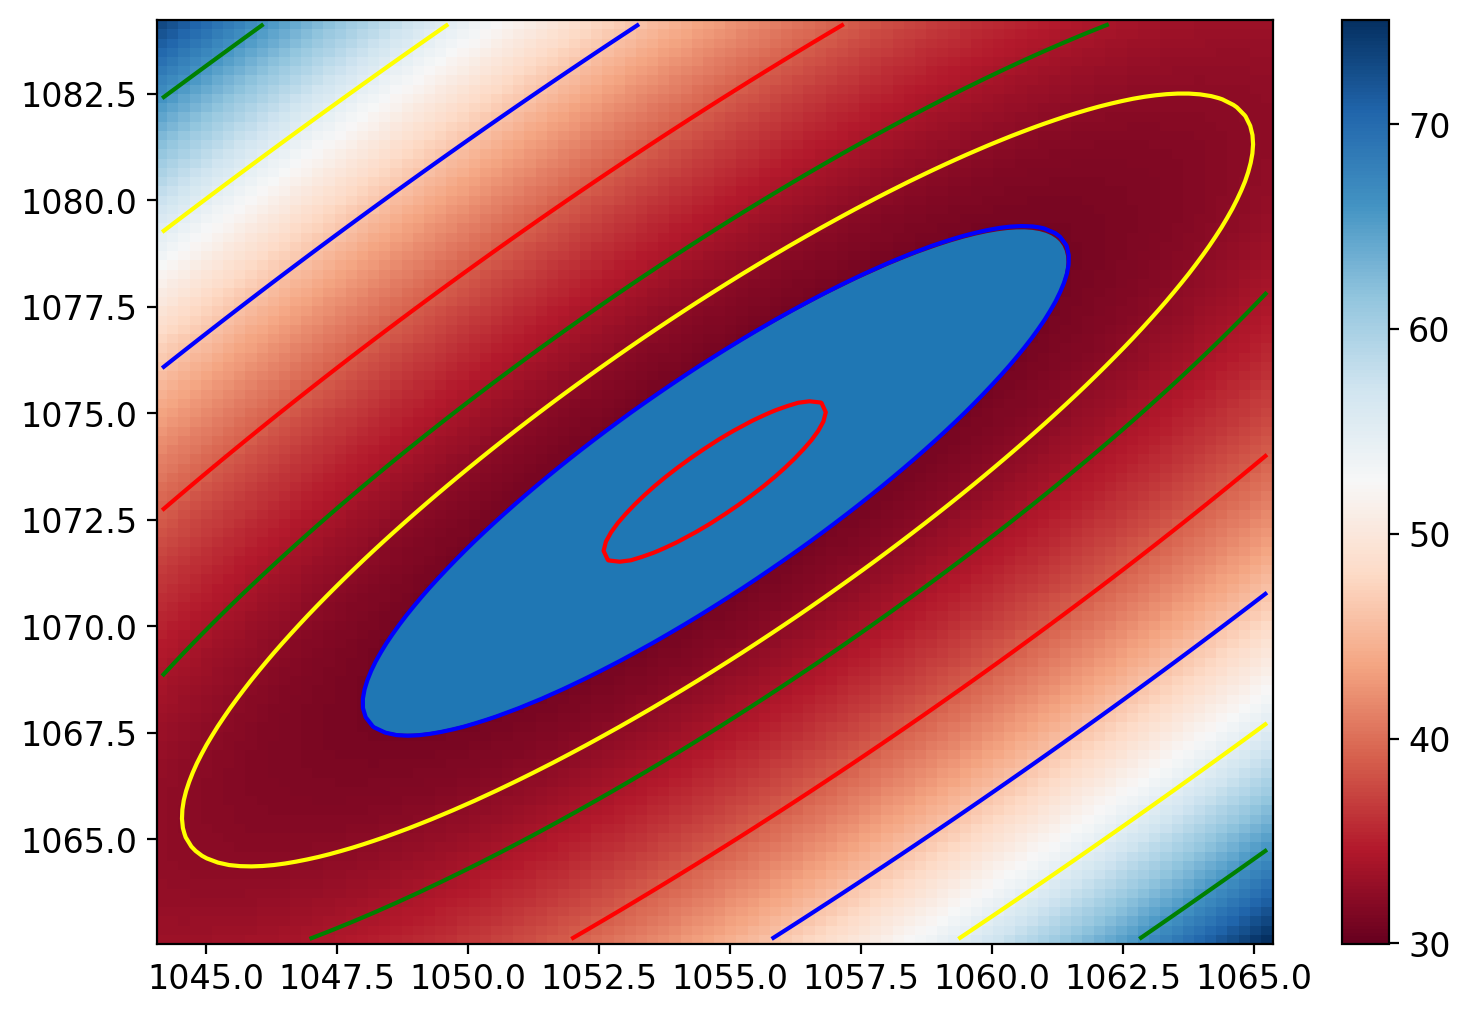

In [77]:
#>>>RUN: L7.5-runcell01

print(np.sqrt(2*sol.hess_inv))
#The diagonals are the uncertainty lmfit quotes

#Really the best way to do this is to get the eigen values using an linear algebra problem
import numpy.linalg as la
w, v=la.eig(2*sol.hess_inv)
print("values",w,"vectors",v)

#Now lets plot the eigenvectors
from matplotlib.patches import Ellipse
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """
    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2* nstd * np.sqrt(eigvals) #the two here is because its width/height not radius
    return Ellipse(xy=centre, width=width, height=height,angle=np.degrees(theta), **kwargs)

err_ellipse=get_cov_ellipse(2*sol.hess_inv,sol.x,1)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
ax.add_artist(err_ellipse)
plt.show()

Now the filled in circles make a direct correspondance with the uncertainties above. 

From the above we can now formulate a description of uncertainties in our system. When we had uncorrelated parameters we had a total uncertainty from our $\chi^{2}$ given by 

$$
\begin{equation}
\sigma_{tot}^{2} = \sigma_{a}^2+\sigma_{b}^2
\end{equation}
$$

Now we have the full ellipse

$$
\begin{equation}
\sigma_{tot}^{2} = \sigma_{a}^2+\sigma_{b}^2+2\sigma_{ab}
\end{equation}
$$

Where we define that $\sigma_{ab}=\rm{COV(a,b)}$. There are a number of ways to call this variable, they all are equivalent, but lets be careful to write it out. We can write the error matrix in 2D as:

$$
\begin{equation}
\left(\begin{array}{cc}
\sigma_{a}^{2} & {\rm COV}(a,b)\\
{\rm COV}(a,b) & \sigma_{b}^{2}
\end{array}\right)=\sum_{i=1}^{N}\left(\begin{array}{cc}
\left(a_{i}-\bar{a}\right)^{2} & \left(a_{i}-\bar{a}\right)\left(b_{i}-\bar{b}\right)\\
\left(a_{i}-\bar{a}\right)\left(b_{i}-\bar{b}\right) & \left(b_{i}-\bar{b}\right)^{2}
\end{array}\right)
\end{equation}
$$

where on the right side we have written it in terms of the computation over events. Recall that for a linear regression the slope is just the $\rm{COV(X,Y)/VAR(X)}$, so the covariance matrix is intricately tied with slope. 

We can also write it as the correlation matrix where we normalize by the uncertainties:

$$
\begin{equation}
\rho=\left(\frac{1}{\sigma_{a}}  \frac{1}{\sigma_{b}} \right)^{T}\left(\begin{array}{cc}
1 & \frac{{\rm COV}(a,b)}{\sigma_{a}\sigma_{b}}\\
\frac{{\rm COV}(a,b)}{\sigma_{a}\sigma_{b}} & 1
\end{array}\right)\left(\frac{1}{\sigma_{a}}   \frac{1}{\sigma_{b}} \right) 
\end{equation}
$$

Recall that the covariance is what we originally used to compute the linear slope of the points, this is exactly the same here. In fact, instead of scanning the likelihood analytically we could have sampled the points, and done a linear regression. The resulting slope and line can be related to our eigenvectors. One last thing to mention is that if variables are correlated, we can use the correlation to propagate the uncertainties. 

$$
\begin{equation}
\sigma_{f}^{2} = \left(\frac{\partial f}{\partial x}\right)^2\sigma_{x}^2 + \left(\frac{\partial f}{\partial y}\right)^{2}+\left(\frac{\partial f}{\partial x}\right)\left(\frac{\partial f}{\partial y}\right)\sigma_{xy}
\end{equation}
$$

Now lets check we can get the corelation matrix.

In [79]:
#>>>RUN: L7.5-runcell02

#Now lets get the correlation C(a,b) (see below)
w, v=np.linalg.eig(2*sol.hess_inv)
print(v)
print("c(a,b)",v[0,1]/v[0,0])
print("A deceptively wrong way to get correlation: since its not normalized",sol.hess_inv[0,1]/sol.hess_inv[0,0])

[[ 0.75631077 -0.65421251]
 [ 0.65421251  0.75631077]]
c(a,b) -0.8650048851048717
A deceptively wrong way to get correlation: since its not normalized 0.7681786214632805


Finally, we are going to run our fit 

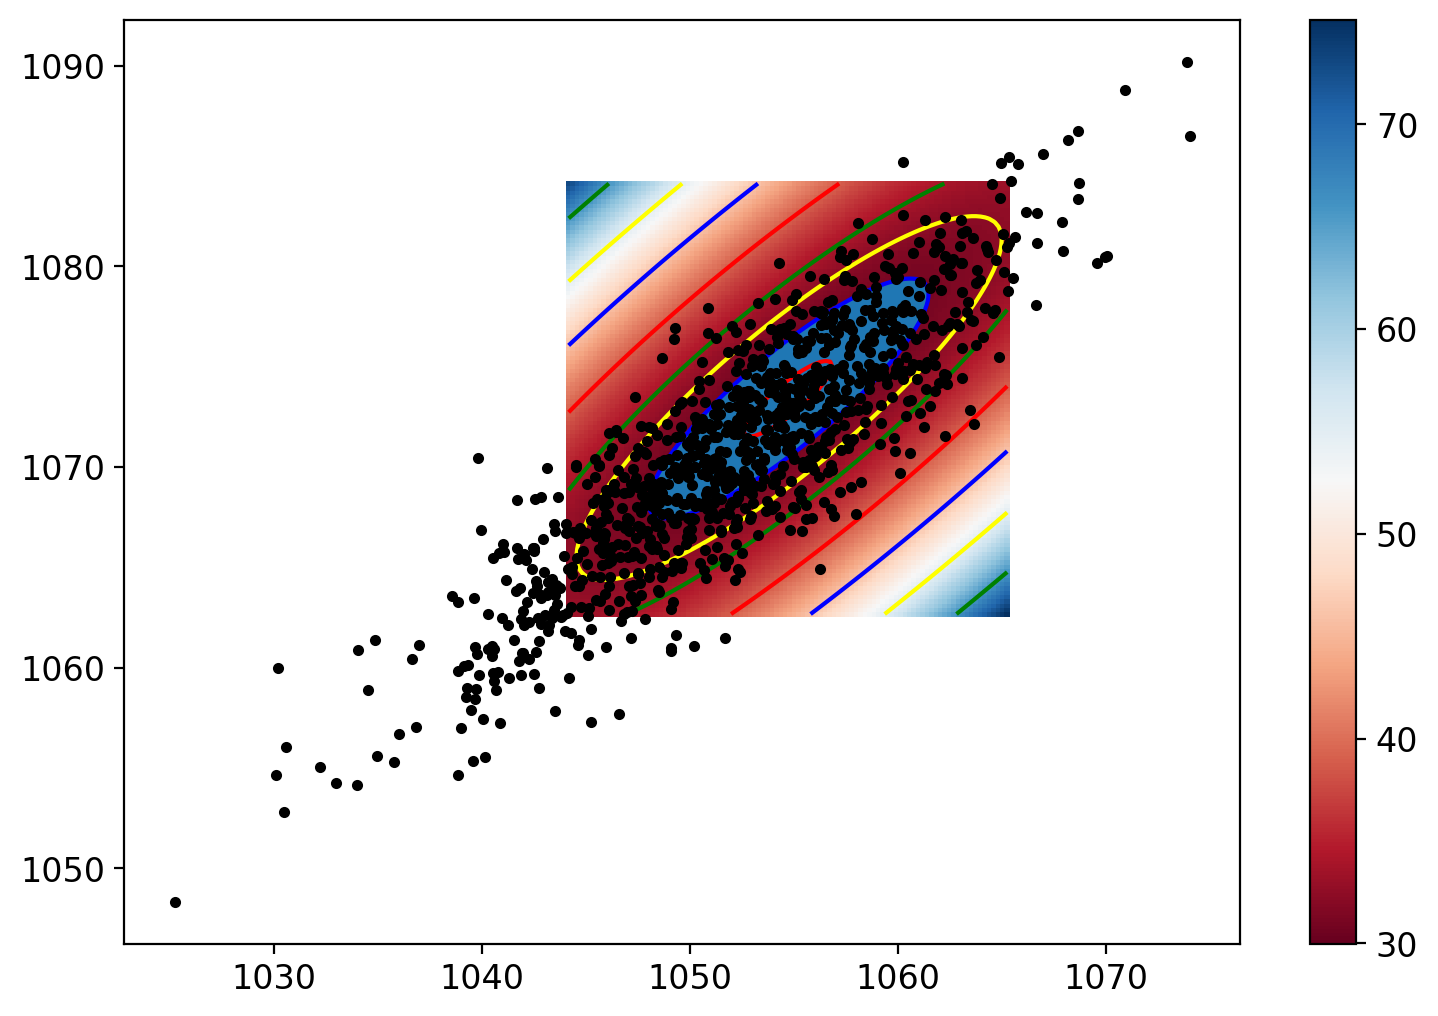

In [84]:
#>>>RUN: L7.5-runcell03

import lmfit

def fnew(x,a,b):
    pVal=b*(1-x)
    return a*x+pVal

#Randomly sample points in the above range
def maketoy(iy):
    toy=np.array([])
    #go through the y-values and Poisson fluctuate
    for i0 in range(len(iy)):
        pVal = np.random.normal (iy[i0],np.sqrt([iy[i0]]))
        toy = np.append(toy,float(pVal))
    return toy

def fittoy(ibin,iy):
    #generate toy
    toy=maketoy(iy)
    #now fit
    model  = lmfit.Model(fnew)
    p = model.make_params(a=1000,b=10)
    xweights=np.array([])
    #setup poison weight
    for i0 in range(len(toy)):
        xweights = np.append(xweights,1./math.sqrt(toy[i0]))
    result = model.fit(data=toy,x=ibin, params=p, weights=xweights)
    return result.params["a"].value,result.params["b"].value

ntoys=1000
lAs=np.array([])
lBs=np.array([])
for i0 in range(ntoys):
    pA,pB=fittoy(xhist,yhist)
    lAs = np.append(lAs,pA)
    lBs = np.append(lBs,pB)

err_ellipse=get_cov_ellipse(2*sol.hess_inv,sol.x, 1)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
ax.add_artist(err_ellipse)
plt.plot(lAs,lBs,c='black',marker='.',linestyle = 'None')
plt.show()

You can see that if we randomly sample from our distributions, then we get the ellipse variation in $A$ and $B$. The toys have a lot of useful elements. We can use it to get the variation in our parameters.  What we can also do is look at the variance of our parameters and compare it to the Hessian that we can diagonalize to get the fit. 

In [85]:
#Now lets run a. linear regression
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

print("A:",lAs.mean(),"+/-",lAs.std())
print("B:",lBs.mean(),"+/-",lBs.std())
print("Cov:",covariance(lAs,lBs),"A Variance:",variance(lAs),"B Variance:",variance(lBs))
print("Check with Hessian:",2*sol.hess_inv)
print("Cor:",covariance(lAs,lBs)/math.sqrt(variance(lAs)*variance(lBs)),"A Variance:",1.,"B Variance:",1.)

A: 1052.314093365461 +/- 6.880115147861381
B: 1070.8256164075774 +/- 5.92066749291077
Cov: 35.38694591218441 A Variance: 47.335984447831635 B Variance: 35.054303561610276
Check with Hessian: [[45.12501138 34.66406903]
 [34.66406903 35.0357585 ]]
Cor: 0.8687137665464967 A Variance: 1.0 B Variance: 1.0


<a name='exercises_7_5'></a>   

| [Top](#section_7_0) | [Restart Section](#section_7_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-7.5.1</span>

Repeat the above uncorrelated fit $f(x) = a x + b$, plot the ellipse, compute the uncertainties in $a$ and $b$? Do they correspond with lmfit? 


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 30
    # variables        = 2
    chi-square         = 29.8718324
    reduced chi-square = 1.06685116
    Akaike info crit   = 3.87155779
    Bayesian info crit = 6.67395255
    R-squared          = 0.99955039
[[Variables]]
    a: -18.6770794 +/- 3.29177096 (17.62%) (init = 1000)
    b:  1071.90427 +/- 5.97746952 (0.56%) (init = 0)


<Figure size 900x600 with 0 Axes>

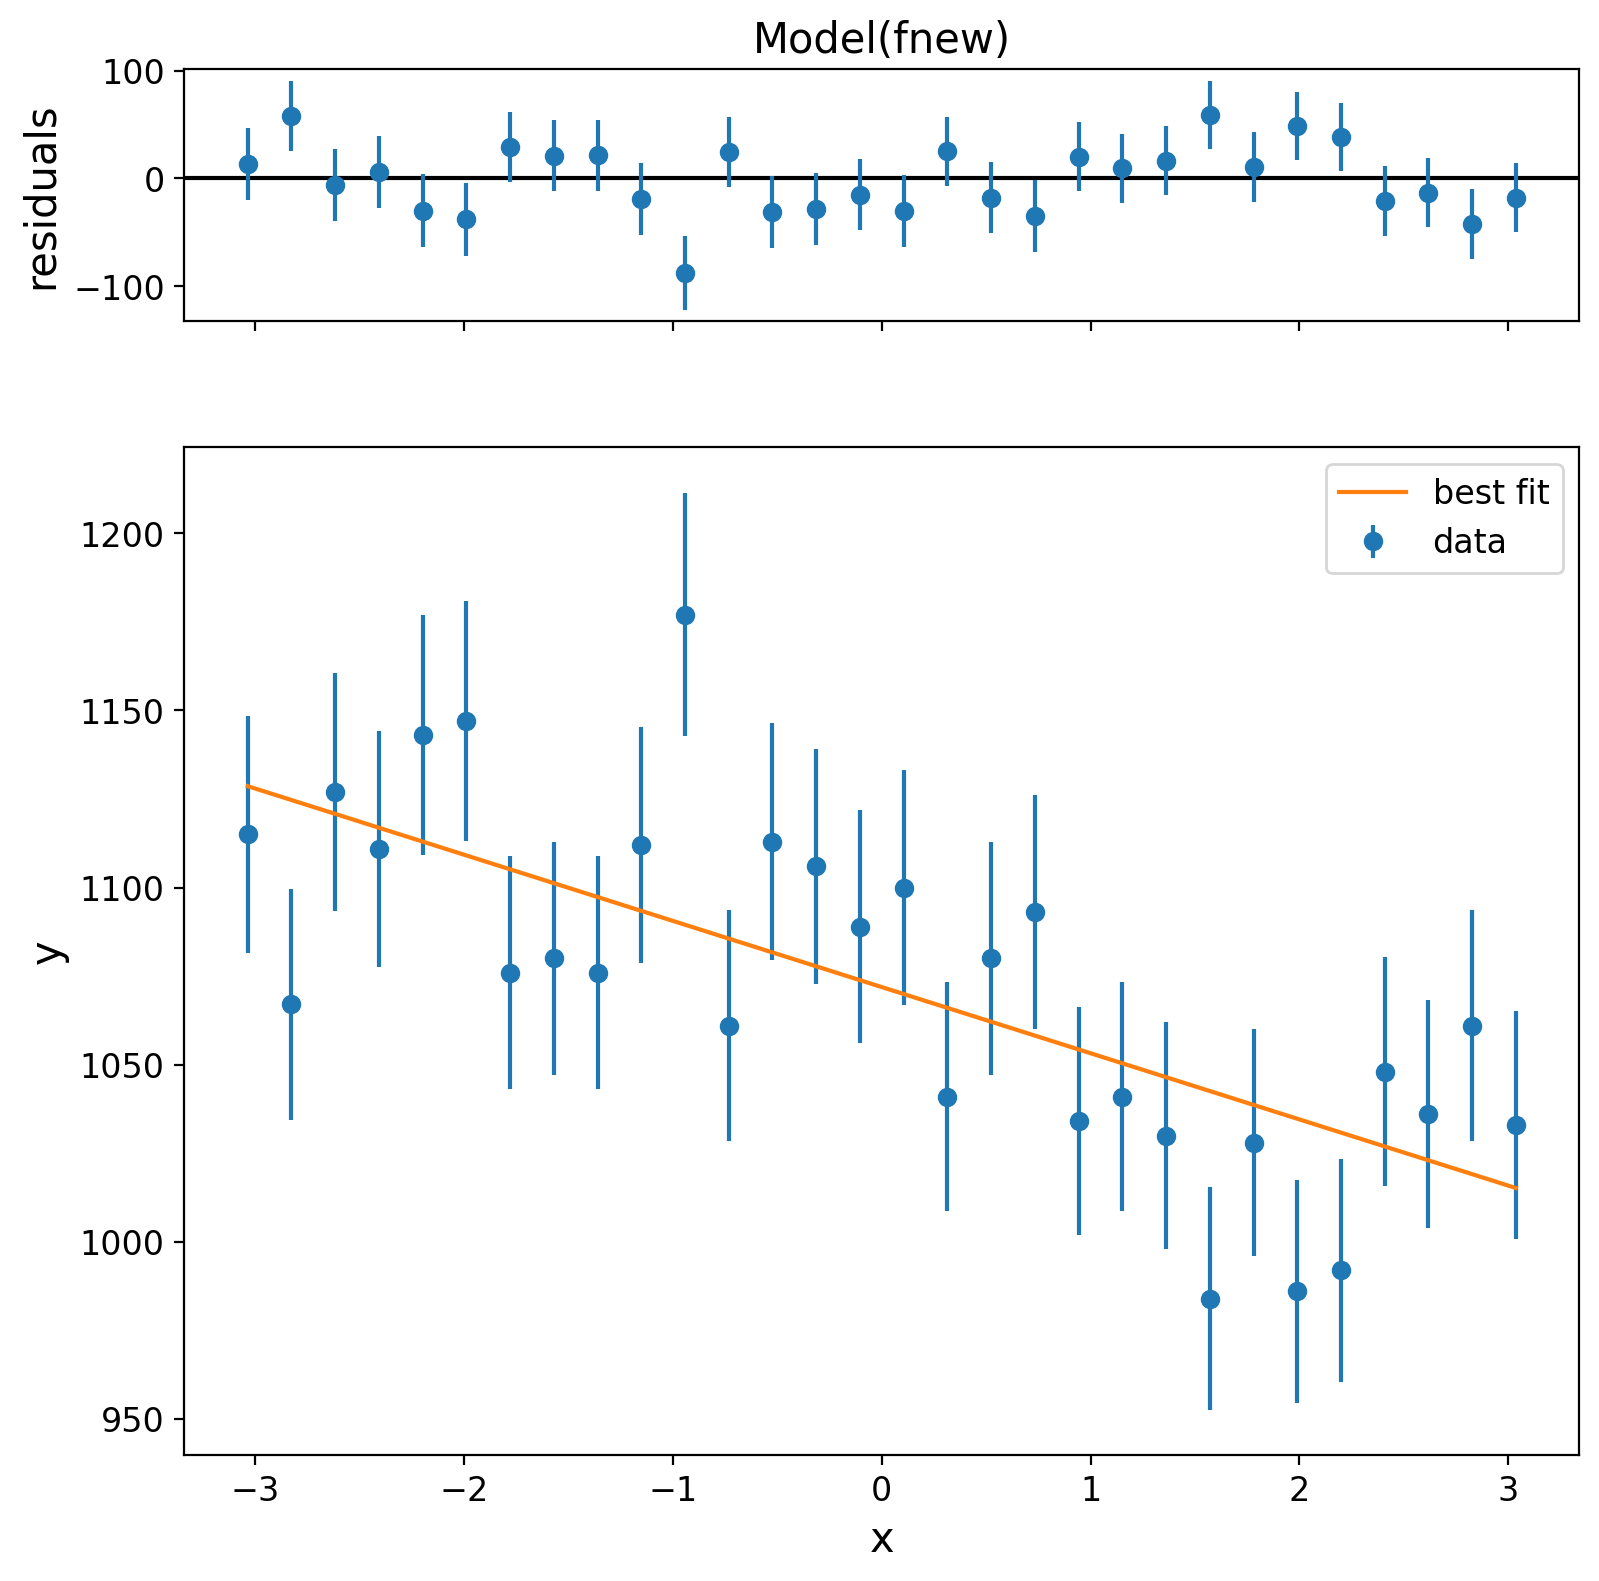

values [10.88036061 34.93700996] vectors [[-0.99949727  0.0317049 ]
 [-0.0317049  -0.99949727]]
matrix a: 3.2985391632111525 b: 5.910753755711429
a: 3.291770957209251 b: 5.9774695225847365


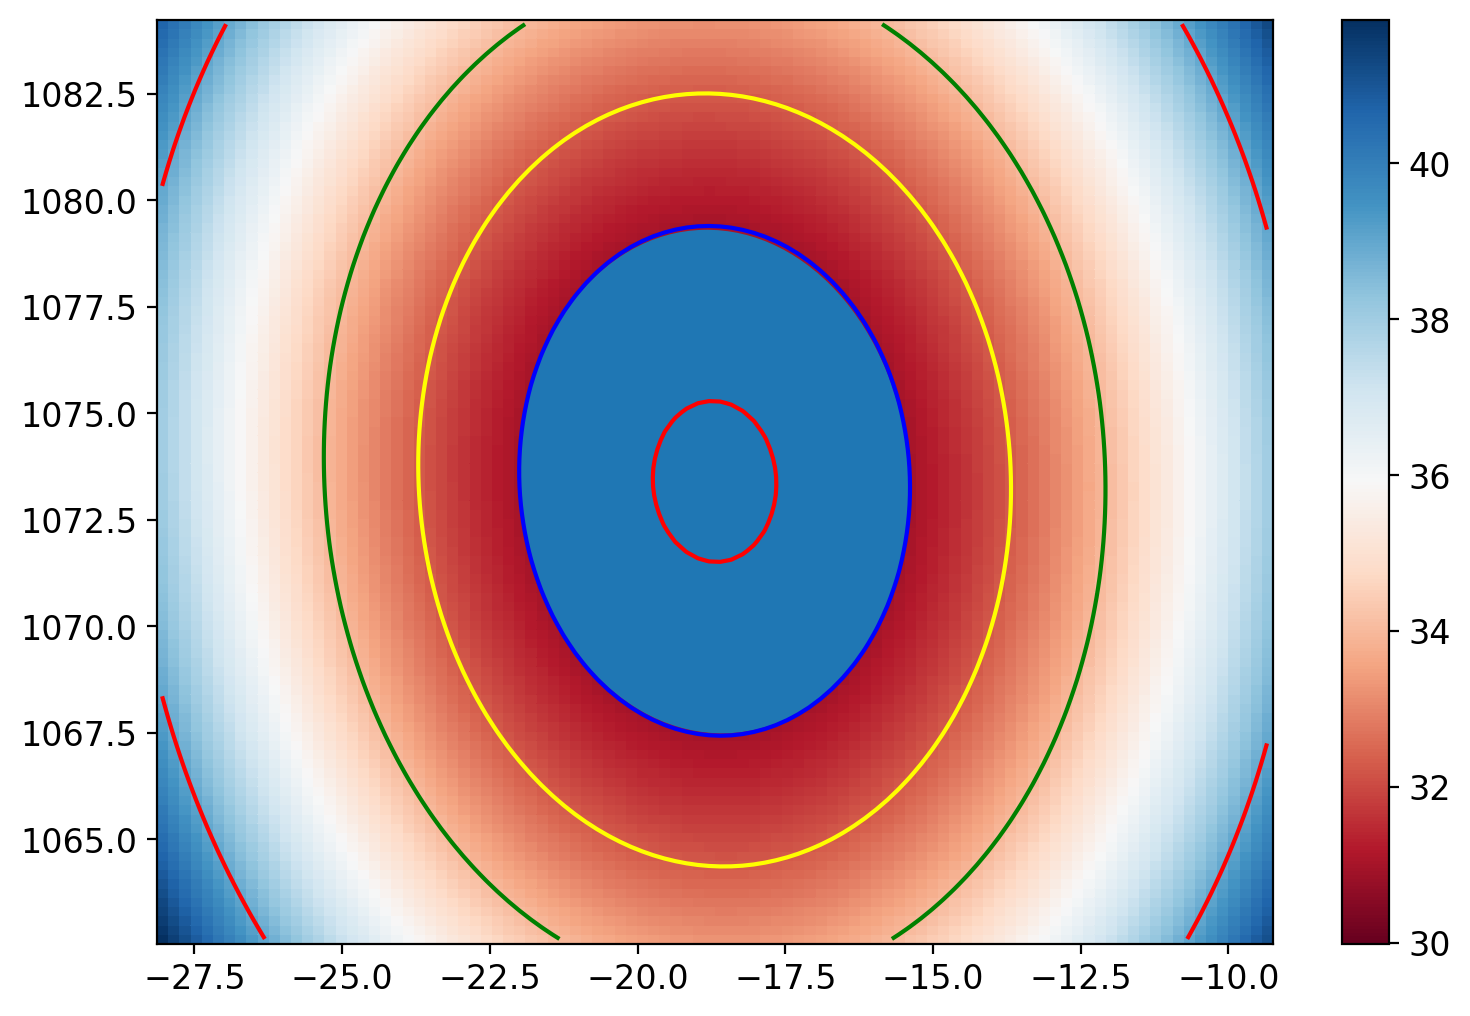

In [27]:
#>>>SOLUTION
def fnew(x,a,b):
    pVal=b
    return a*x+pVal

##Copying andn pasting everything from above
model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=0)
result = model.fit(data=yhist,x=xhist, params=p, weights=xweights,scale_covar=False)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()

x0 = np.array([-20,1000])
ps = [x0]
sol=opt.minimize(chi2, x0)
w, v=la.eig(2*sol.hess_inv)
print("values",w,"vectors",v)
print("matrix a:",np.sqrt(w[0]),"b:",np.sqrt(w[1]))
print("a:",result.params["a"].stderr,"b:",result.params["b"].stderr)

x = np.linspace(sol.x[0]*0.5,sol.x[0]*1.5, 100)
y = np.linspace(sol.x[1]*0.99,sol.x[1]*1.01, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([chi2([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
err_ellipse=get_cov_ellipse(2*sol.hess_inv,sol.x,1)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
levels = [0.1,1.0,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
ax.add_artist(err_ellipse)
plt.show()

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
We find the uncertainties are comparable to lmfit. 
</pre>
        
**EXPLANATION:**
    
You will notice that to get the uncertainties we used this `scale_covar=False` formula, this computes the uncertainties from the Hessian in lmfit. Otherwise, it applies a correction to the uncertainties to account for the scenario when the fit $\chi^{2}$ is large. 
    
</div>


<hr style="height: 1px;">
<i>This notebook was authored by the 8.316x Course Team, Copyright 2023 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 8: Fitting Neutrino Data</h1>


<a name='section_8_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L8.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_8_1">L8.1 Neutrino Oscillations</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_8_1">L8.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_8_2">L8.2 Loading the Data</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_8_2">L8.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_8_3">L8.3 Fitting the Master Function to the Data</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_8_3">L8.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_8_4">L8.4 Principal Component Analysis</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_8_4">L8.4 Exercises</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

In this Lesson we will consider the following questions:

- Why Do Neutrinos Oscillate?
- What does this mean in terms of mesurement?

We will also briefly explore the topic of principal component analysis.


In [ ]:
#>>>RUN: L8.0-runcell02

import numpy as np                 #https://numpy.org/doc/stable/
from scipy import optimize as opt  #https://docs.scipy.org/doc/scipy/reference/optimize.html
import matplotlib.pyplot as plt    #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import lmfit                       #https://lmfit.github.io/lmfit-py/ 
import scipy.stats as stats        #https://docs.scipy.org/doc/scipy/reference/stats.html
import uproot                      #https://uproot.readthedocs.io/en/latest/
from sklearn.decomposition import PCA                   #https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.datasets import fetch_lfw_people           #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
from sklearn.decomposition import PCA as RandomizedPCA  
from astroML.datasets import sdss_corrected_spectra

<a name='section_8_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L8.1 Neutrino Oscillations</h2>  

| [Top](#section_8_0) | [Previous Section](#section_8_0) | [Exercises](#exercises_8_1) | [Next Section](#section_8_2) |


<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L08/slides_L08_01.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L8.1-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L08/slides_L08_01.html', width=970, height=550)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-8.1.1</span>

For a neutrino beam that has a detector 1000km away, like is present with the DUNE neutrino experiment, what is the optimal energy (in GeV) to observe muon neutrino disappearance given a neutrino energy > 0.5 GeV?

Use the master formula below, which outputs the probability of oscillating from a muon neutrino to a muon neutrino, as a function of energy (in units of GeV). Find the minimum of the function to determine where the muon neutrino disappears.

Enter your answer as a number with precision 1e-2. 

In [ ]:
#>>>EXERCISE: L8.1.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def master_formula(E,L=1000):
    deltam=1*1e-3
    sin2theta23=0.57
    xval=1.27*deltam*scale1*L/E
    #val=1-4*scale2*sin2theta23*(1-scale2*sin2theta23)*np.sin(xval)**2
    val=1-4*sin2theta23*(1-sin2theta23)*(np.sin(xval)**2)
    return val



Minimum Energy is  0.8100000000000003


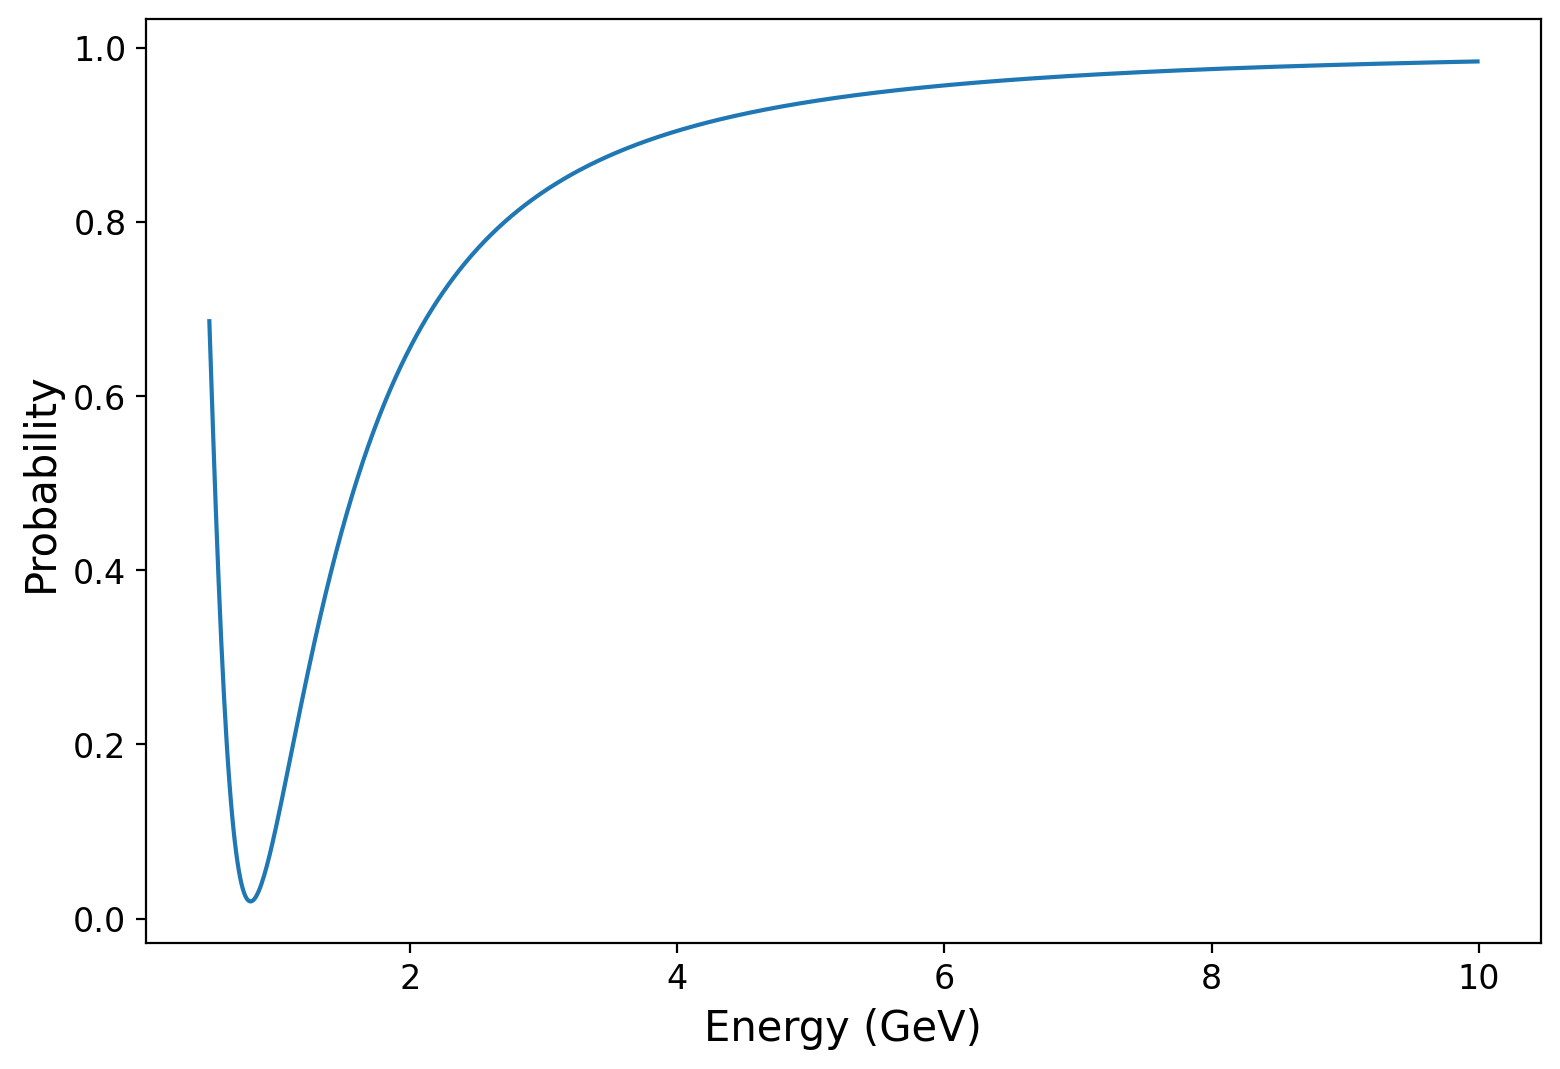

Text(0.5, 0, 'Distance')

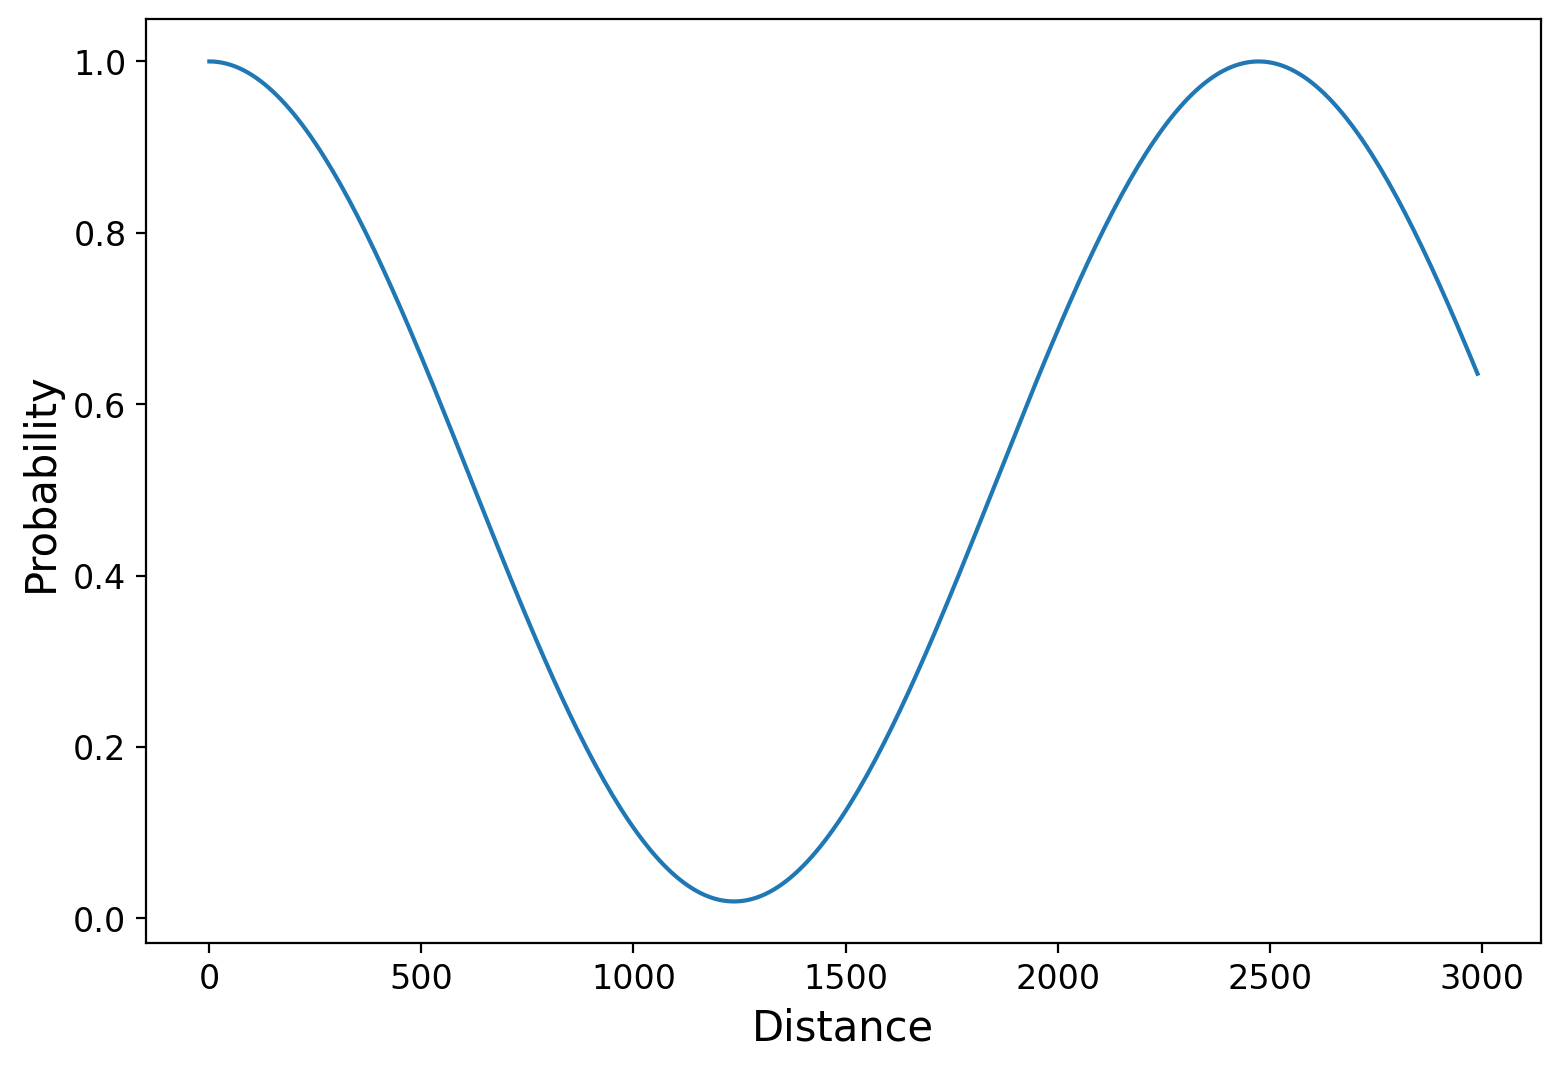

In [91]:
#>>>SOLUTION: L8.1.1

def master_formula(E,L=1000):
    deltam=1*1e-3
    sin2theta23=0.57
    xval=1.27*deltam*L/E
    #val=1-4*scale2*sin2theta23*(1-scale2*sin2theta23)*np.sin(xval)**2
    val=1-4*sin2theta23*(1-sin2theta23)*(np.sin(xval)**2)
    return val

evals=np.arange(0.5,10,0.01)
mixvals=master_formula(evals)
plt.plot(evals,mixvals)
plt.ylabel("Probability")
plt.xlabel("Energy (GeV)")
print("Minimum Energy is ",evals[np.argmin(mixvals)])
plt.show()

evals=np.arange(0,3000,10)
mixvals=master_formula(1,evals)
plt.plot(evals,mixvals)
plt.ylabel("Probability")
plt.xlabel("Distance")

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
0.81 GeV 
</pre>
        
**EXPLANATION:**

We want to get the maximum amount of muon neutrino disappearance. This is done by finding the minium of the master formula over the full energy range. We see this minimum occurs at 0.81 GeV. Alternatively, we could have varied the length at a fixed energy. 
    
    
</div>


>#### Follow-up 8.1.1a (ungraded)
>
>What other parameters of this experiment could we vary to observe the neutrino disappearance?

<a name='section_8_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L8.2 Loading the Data</h2>  

| [Top](#section_8_0) | [Previous Section](#section_8_1) | [Exercises](#exercises_8_2) | [Next Section](#section_8_3) |


<h3>Fitting Neutrino data</h3>

In this part of the lecture, I would like to fit data from one of the recent neutrino experiments. The data consists of events at various energies that are observed from neutrino-matter interactions in the NO$\nu$A experiment in Minnesota. Details about this experiment can be found <a href="https://inspirehep.net/files/0a3cd74d55753d242b2a364ce70a5e0e" target="_blank">here</a>.

There are 3 type of neutrinos, the electron, muon and $\tau$ neutrino. These neutrinos all interact in roughly the same way, through the weak interaction. Additionally, these neutrinos are all known to be very light. Lastly, it is found that these neutrinos are capable of changing from one type to another over time. What that means is that an electron neutrino can oscillate into a muon neutrino or a $\tau$ neutrino, and so on. The fact that they oscillate is a bit of a mystery, but what we do know is that this means the way mass is generated for the neutrinos is a different mechanism to the way it interacts.  

To understand the data, we need to consider the key components of this experiment, which is that we first create a beam of neutrinos at Fermilab in Illinois, and we then fire this beam at the NO$\nu$A experiment in Minnesota. At NO$\nu$A we check to see what we observe. Since neutrinos interact very weakly, we do this by counting interactions of muon neutrinos in two separate detectors, one Fermilab and the other at NO$\nu$A. Between Fermilab and NO$\nu$A, some of these muon neutrinos will oscillate into other types of neutrino through quantum mechanical mixing. This is a great way to test the properties of quantum mechanics. You can read more about that <a href="https://arxiv.org/abs/1602.00041" target="_blank">here</a>.

That being said, what we expect to compare is the shape of the observed events from the input beam, with the shape of the output beam. Since neutrinos interact very weakly, the way we perform this is we put a large detector near the input beam, and we measure the rate of muon neutrinos, and then we put an even larger detector at the output beam, and we measure the rate. Let's take a look at this data. 

The data is in root format, like the project. We will use uproot to load the data and see what it is like. 

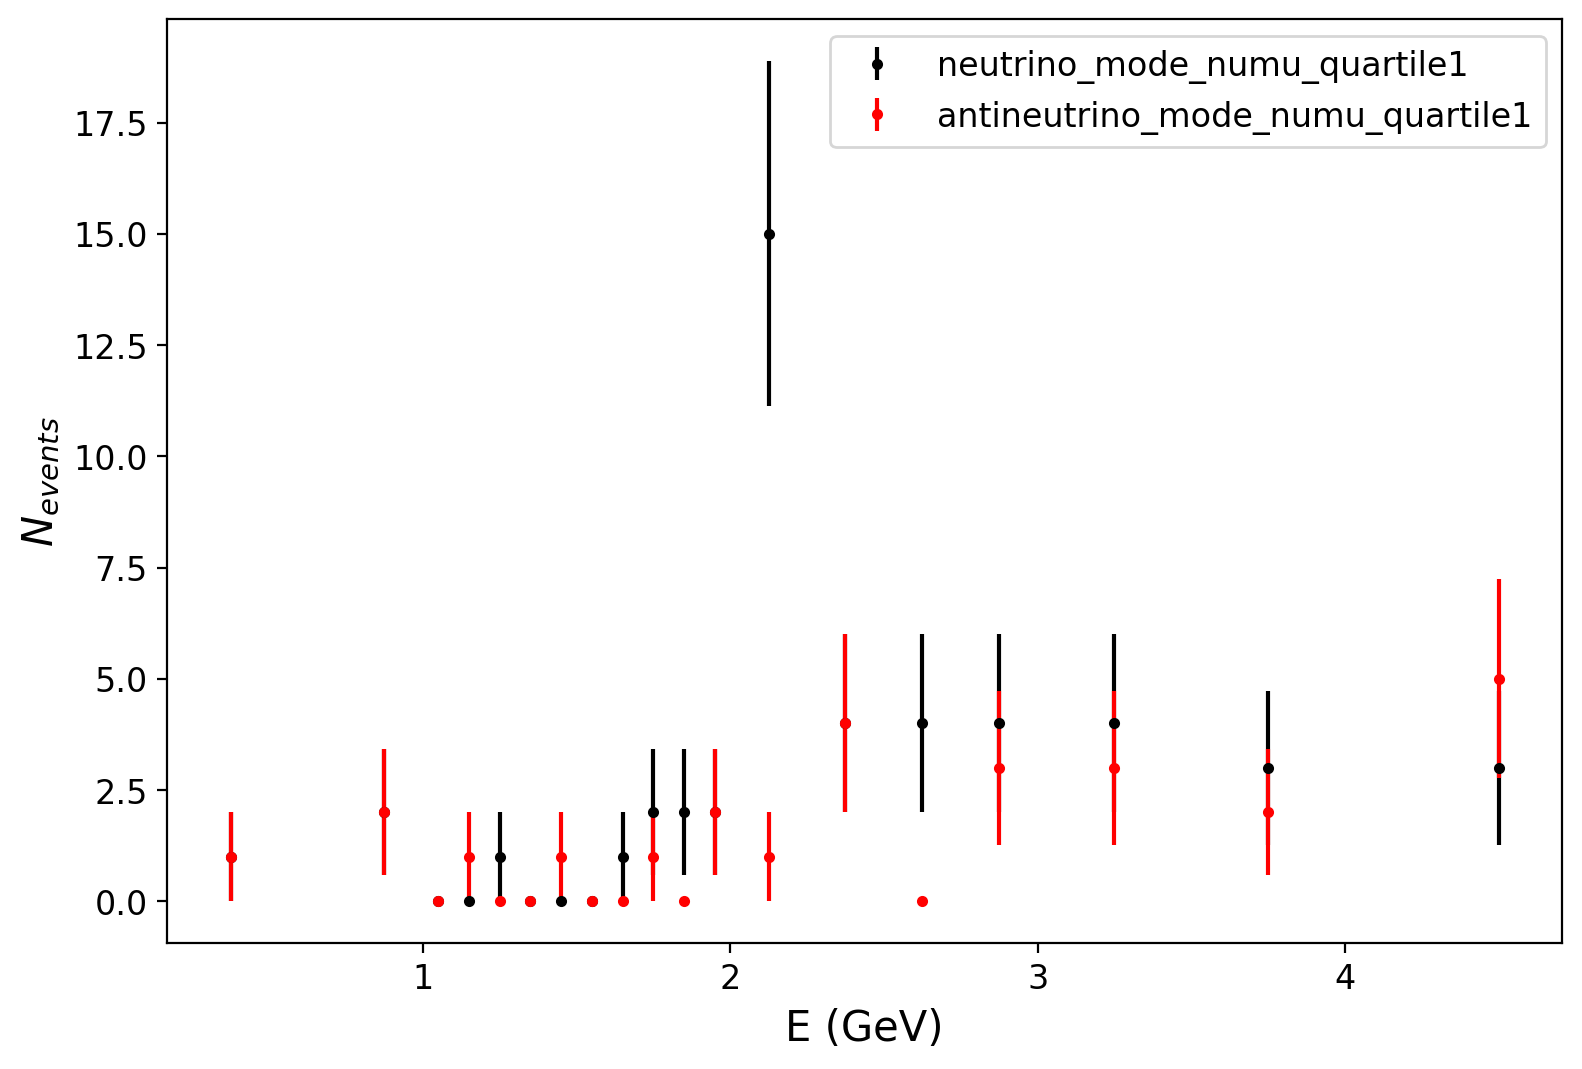

In [29]:
#>>>RUN: L8.2-runcell01

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import uproot

file = uproot.open("data/NOvA_2020_data_histograms.root")

#print(file.classnames())

def plot(iLabel,iFile,iColor):
    bin_edges = iFile[iLabel].axis().edges()
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    plt.xlabel("E (GeV)")
    plt.ylabel("$N_{events}$")
    plt.errorbar(bin_centers,iFile[iLabel].values(),yerr=iFile[iLabel].errors(),marker='.',linestyle = '', color = iColor,label=iLabel)    
    
plot("neutrino_mode_numu_quartile1",file,'black')
plot("antineutrino_mode_numu_quartile1",file,'red')
plt.legend()
plt.show()

    

So, we see two neutrino samples with four quartiles. The quartiles turn out to be different quality selections on the data. Quartile 1 is the most sensitive quartile, whereas Quartile 2, 3, and 4 are progressively less sensitive. How these quartiles are chosen depends on the beam, detector performance, and quality of the reconstruction. For our measurement, we can sum them all up and treat them as one measurement. 

The other label we see is the anti-neutrino and neutrino labels for the type of beam. The beam at Fermilab can be run in two different modes. One mode is neutrino mode. In this mode, particles are fired into the beam that mostly decay into regular neutrinos. The other mode is anti-neutrino mode, in that scenario particles are fired into the beam that decay into anti-neutrinos. 

Suffice it to say there is no guarantee that anti-neutrinos and neutrinos oscillate in the same way, so we keep these samples separate. We can look at the separate quartiles, but let's do that later. 

Instead, let's look at another root file that has the predictions for what we expect the neutrino beam to look like. 

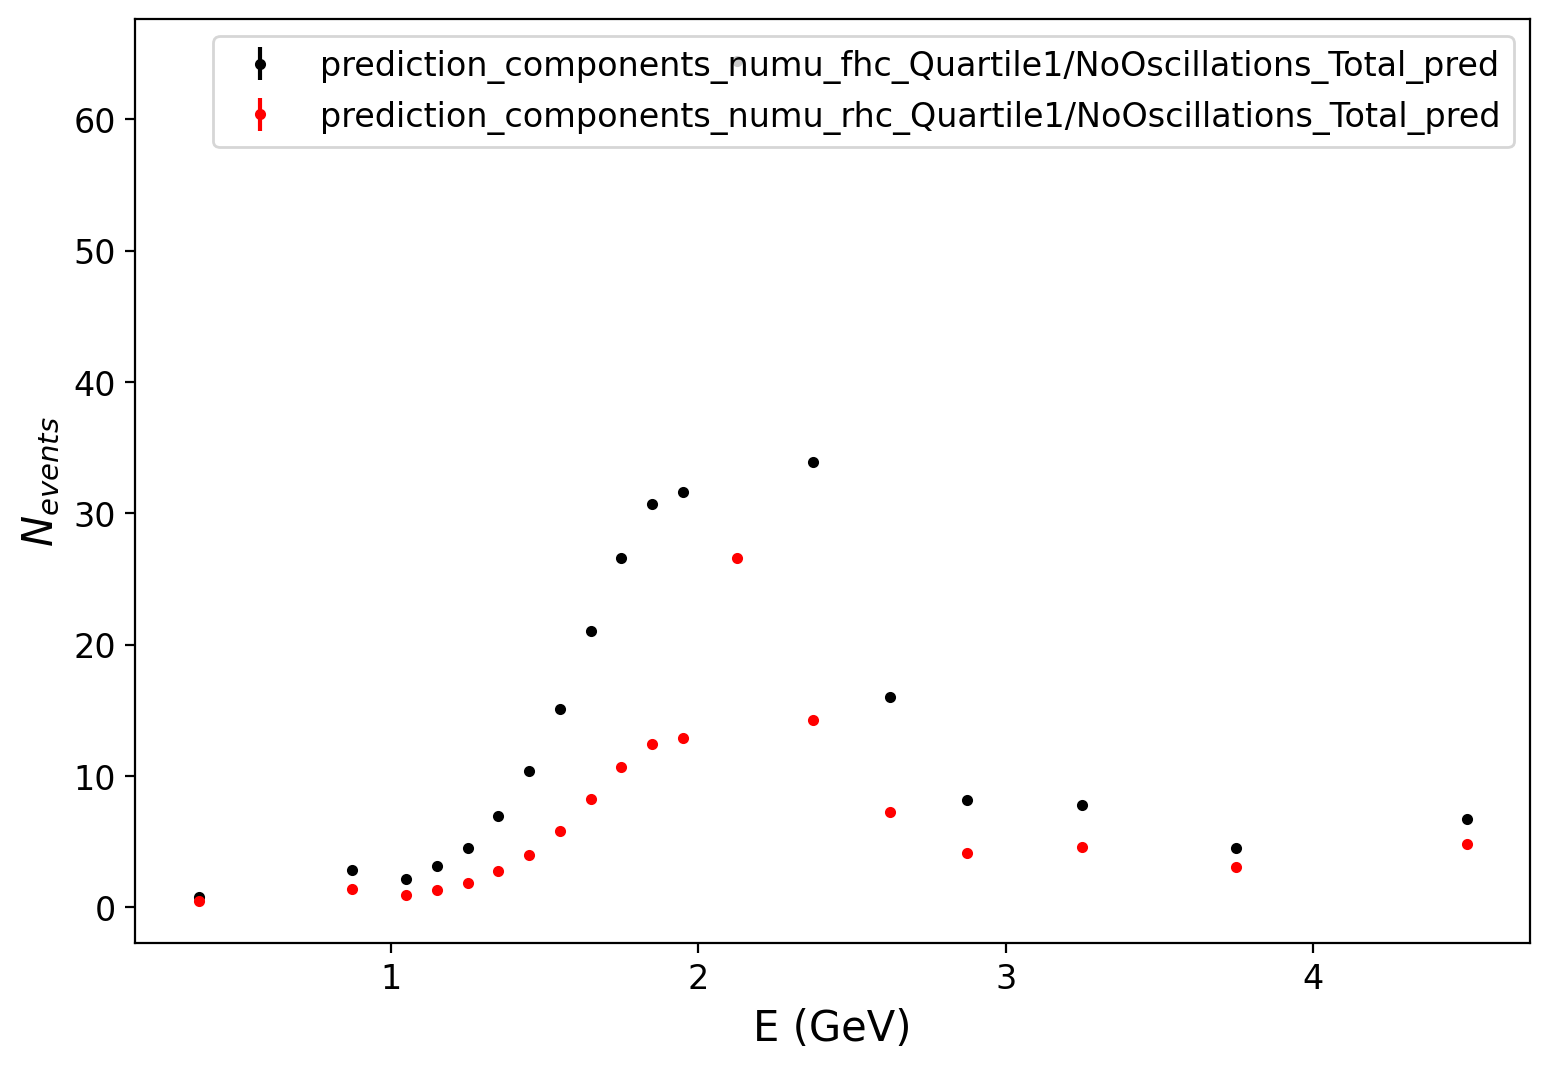

In [30]:
#>>>RUN: L8.2-runcell02

filePred = uproot.open("data/NOvA_2020_data_release_predictions_with_systs_all_hists.root")

#print(filePred.classnames())
plot("prediction_components_numu_fhc_Quartile1/NoOscillations_Total_pred",filePred,'black')
plot("prediction_components_numu_rhc_Quartile1/NoOscillations_Total_pred",filePred,'red')
plt.legend()
plt.show()

This file is messy. I won't go into the details but let me put some labels here, to reconcile things. First of all, we see prediction_components_rhc_Quartile. Quartile is the same as before. RHC, and its counterpart FHC standard for "Reverse Horn Current" (RHC) and "Foward Horn Current".   The FHC configuration focuses charged particles with positive polarity (pions, $\pi^{+}$ and Kaons, $K^{+}$) which decay to give a neutrino beam ($\nu_{\mu}$) whereas, the RHC configuration focuses charged particles with negative polarity (pions,$\pi^{-}$ and Kaons, $K^{-}$) that decay to give an anti-neutrino enhanced beam ($\bar{\nu}_{\mu}$). 

Furthermore, the predictions are done under the assumption that there are no oscillations. Hence, the "NoOscillations" label.

<h3>Neutrino Oscillations</h3>

To understand how to fit this data, we follow from the master formula for neutrino oscillations. For those familiar with quantum mechanics, let's write out what the neutrino particle eigen-state is:

$$
\begin{equation}
 |\nu_{\mu}\rangle = U^{*}_{\mu 1}|\nu_{1}\rangle + U^{*}_{\mu 2}|\nu_{2}\rangle + U^{*}_{\mu 3}|\nu_{3}\rangle
\end{equation}
$$

Where $U_{\mu i}$ is the muon row of the oscillation matrix. When you evolve each piece $i$ of this state over time $t$ and allow the neutrino of energy $E$ and mass $m_{i}$ to move forward a length $L$, you will get that (skipping some steps) 

$$
\begin{eqnarray}
 |\nu_{i}(L)\rangle = e^{-iEt-\vec{p}\cdot\vec{x}}|\nu_{i}\rangle \\
               \approx e^{-i\frac{Lm^{2}_{i}}{2E}}|\nu_{i}(L=0)\rangle
\end{eqnarray}
$$

and, thus, even for identical energies $E$, separate mass eigenstates $\nu_{1}$, $\nu_{2}$ and $\nu_{3}$ will evolve at different rates because of the $m_{i}$ term. What that means is that the probability for neutrinos to still be there can be written by the following master formula: 

$$
\begin{eqnarray}
 P_{\mu\rightarrow\mu} & = &  \left|\langle\nu_{\mu}(L)|\nu_{\mu}(0)\rangle\right|^{2} \\
                       & \approx & 1-\sin^{2}\theta_{23}\sin^{2}\left(\frac{1.27\Delta m^{2}_{23}}{E} L\right)  
\end{eqnarray}
$$

where $\sin^{2}\theta_{23}$ is the parameter that describes the rate of oscillation between muon neutrinos and $\tau$ neutrinos, and $m^{2}_{23}=m_{3}^2-m_{2}^2$ is the mass difference between the $\tau$ and muon neutrino. You may ask, why is the electron neutrino not involved. It turns out that its rate of oscillations is too small to impact this measurement. 

Given that, what we can do then is take our original data, divide it by our no oscillation expectation and fit it. In this case, what we would like to extract is not just one parameter, but two parameters $\theta_{23}$ and $m^{2}_{23}$. Let's see if we can get them. 

First, let's prepare our ratio data, starting by constructing the ratio for each quantile.


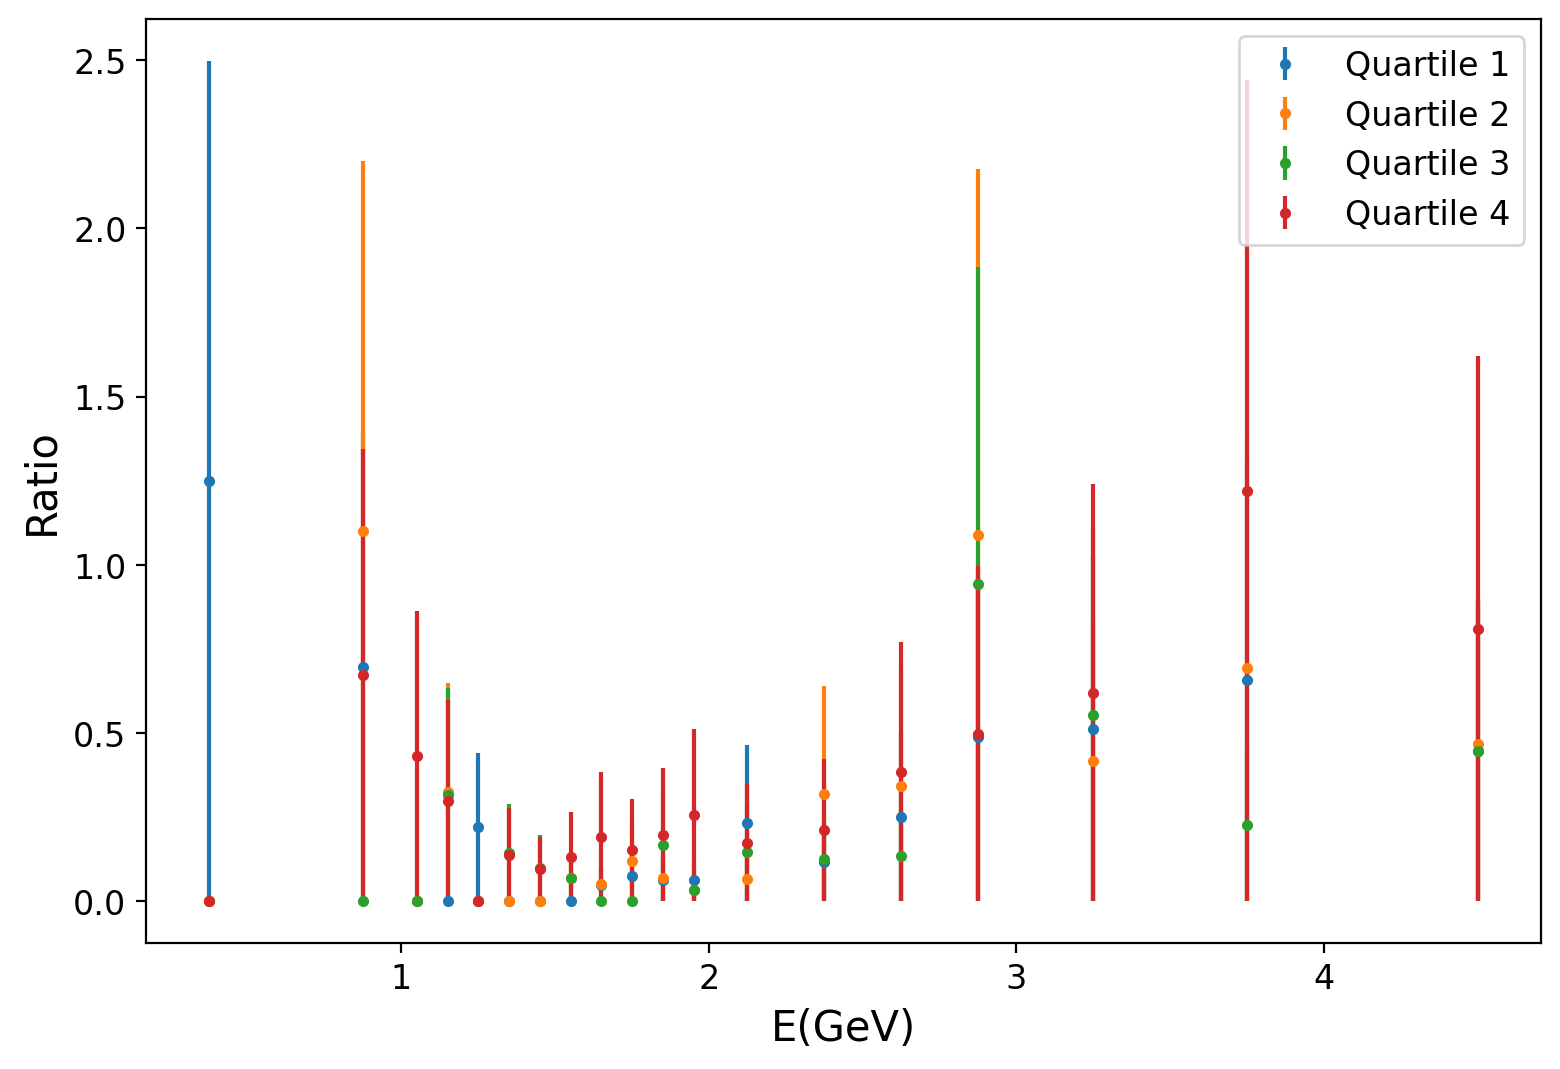

In [31]:
#>>>RUN: L8.2-runcell03

nquartiles=4
label="neutrino_mode_numu_quartile"
predlabel0="prediction_components_numu_fhc_Quartile"
predlabel1="/NoOscillations_Total_pred"
bin_edges=file[label+"1"].axis().edges()
x = 0.5*(bin_edges[1:] + bin_edges[:-1])
def ratio(iQuartile,iPlot=False):
    ytop=file[label+str(i0+1)].values()
    ytop_err=file[label+str(i0+1)].values()
    ybot=filePred[predlabel0+str(i0+1)+predlabel1].values()
    #ybot_err=file[label+str(i0+1)].values() we will skip this since the error is much smaller
    y = ytop/ybot
    y_err = ytop_err/ybot #we will ignore the ybot error since it is tiny
    if iPlot:
        plt.errorbar(x,y,yerr=y_err,marker='.',linestyle = '',label="Quartile "+str(i0+1))
    return y,y_err
    
for i0 in range(nquartiles):
    ratio(i0,True)
    
plt.xlabel("E(GeV)")
plt.ylabel("Ratio")
plt.legend()
plt.show()

Now, what we would like to do is combine these ratios together. However, we need to do an average weighted by their uncertainties. To do that, we will define for the i-th bin in the ratio $r_{i}$ for the j-th quartile, the <a href="https://en.wikipedia.org/wiki/Weighted_arithmetic_mean" target="_blank">weighted mean</a>

$$
\begin{equation}
 \bar{r}_{i} = \frac{1}{\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} }\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} r_{ij}
\end{equation}
$$

This is the maximum likelihood mean for normally distributed independent variables (see above). The weighted variance is then given by propagation of errors as

$$
\begin{equation}
 \sigma^{2}_{i} = \left(\frac{1}{\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} }\right)^{2}\sum_{j=1}^{4} \frac{1}{\sigma^{4}_{ij}} \sigma^{2}_{ij} \\
  \sigma^{2}_{i} = \left(\frac{1}{\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} }\right)^{2}\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} \\
\sigma^{2}_{i} = \left(\frac{1}{\sum_{j=1}^{4} \frac{1}{\sigma^{2}_{ij}} }\right)
\end{equation}
$$

Let's go ahead and combine them.

In [ ]:
#>>>RUN: L8.2-runcell04

def combinedRatio():
    y,y_err = ratio(0,False)
    y_arrs=np.array([y])
    weight_arrs=np.array([y_err])
    for i0 in range(nquartiles-1):
        y,y_err = ratio(i0,False)
        y_arrs=np.vstack([y_arrs,y])
        weights=1./(y_err**2)
        weights[weights == np.inf] = 0.1
        weight_arrs = np.vstack([weight_arrs,weights])
    #Now do the weighted 
    yout=np.average(y_arrs,weights=weight_arrs,axis=0)
    weights=np.sum(weight_arrs,axis=0)
    return yout,1/weights**0.5,weights**0.5

label="neutrino_mode_numu_quartile"
predlabel0="prediction_components_numu_fhc_Quartile"
y,yerr,weights=combinedRatio()    

label="antineutrino_mode_numu_quartile"
predlabel0="prediction_components_numu_rhc_Quartile"
y_anti,yerr_anti,weights_anti=combinedRatio()    

plt.errorbar(x,y,yerr=yerr,marker='.',linestyle = '',label="neutrino")
plt.errorbar(x,y_anti,yerr=yerr_anti,marker='.',linestyle = '',label="anti-neutrino")
plt.xlabel("E(GeV)")
plt.ylabel("Ratio")
plt.legend()
plt.ylim(0,1.5)
plt.show()

<a name='exercises_8_2'></a>     

| [Top](#section_8_0) | [Restart Section](#section_8_2) | [Next Section](#section_8_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-8.2.1</span>

In this problem, we want to show that the weighted average with weight given by $\frac{1}{\sigma^2}$ minmizes the uncertainty. For this case, consider a weighted average of two numbers $x$ and $y$. We can define the weighted average $\bar{x}$ as 

$$\bar{x}=f x + (1-f) y$$

where $0 \geq f \geq 1$ is our weight factor. The uncertainty on $\bar{x}$ can be written as 


$$\sigma^2_{\bar{x}}=f^2 \sigma_{x}^2 + (1-f)^2 \sigma_{y}^2$$ 

To minimize the uncertainty all we need to do is 

$$ \frac{d\sigma_{\bar{x}}^2}{df} = 0$$

What is the value of $f$ that minimizes the uncertainty? Express your answer using `sigmax` for $\sigma_{x}$ and `sigmay` for $\sigma_{y}$.


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**


$$ \frac{d\sigma_{\bar{x}}^2}{df} = 2f\sigma_{x}^2 - 2(1-f)\sigma_{y}^2 = 2f(\sigma_{x}^2+\sigma_{y}^2) - 2\sigma_{y}^2 = 0$$

$$ f = \frac{\sigma_{y}^2}{\sigma_{x}^2+\sigma_{y}^2} = \frac{\frac{1}{\sigma_{x}^2\sigma_{y}^2}}{\frac{1}{\sigma_{x}^2\sigma_{y}^2}} \frac{\sigma_{y}^2}{\sigma_{x}^2+\sigma_{y}^2} $$

$$ f = \frac{\frac{1}{\sigma_{x}^2}}{\frac{1}{\sigma_{y}^2} + \frac{1}{\sigma_{x}^2}} $$
        
**EXPLANATION:**
    
The point being is that weighting by $1/\sigma^2$ gives you the best weighted mean. 
    
</div>


>#### Follow-up 8.2.1a (ungraded)
>
>Show that this yields the weighted average formula that we previously derived. Try on your own, or see the solution to the problem above.
>
>Hint: You might have to multiply your final result by:
>
>$$\frac{\frac{1}{\sigma_{x}^2\sigma_{y}^2}}{\frac{1}{\sigma_{x}^2\sigma_{y}^2}}$$

<a name='section_8_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L8.3 Fitting the Master Function to the Data</h2>  

| [Top](#section_8_0) | [Previous Section](#section_8_2) | [Exercises](#exercises_8_3) | [Next Section](#section_8_4) |


<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L08/slides_L08_03.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L8.3-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L08/slides_L08_03.html', width=970, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L08/slides_L08_01.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L08/slides_L08_03.html" width="900", height="550" frameBorder="0"/>
</p>

Ok, now that we have the points, let's finally fit the data.

In [ ]:
#>>>RUN: L8.3-runcell01

import lmfit
deltam=1*1e-3
L=810
sin2theta23=1.0
def func(x,scale1,scale2):
    xval=1.27*deltam*scale1*L/x
    #val=1-4*scale2*sin2theta23*(1-scale2*sin2theta23)*np.sin(xval)**2
    val=1-4*scale2*(1-scale2)*(np.sin(xval)**2)
    return val

def fit(iX,iY,iWeight):
    model  = lmfit.Model(func)
    p = model.make_params(scale1=1.0,scale2=0.6)
    result = model.fit(x=iX[iY > 0],data=iY[iY > 0], params=p, weights=iWeight[iY > 0])
    lmfit.report_fit(result)
    result.plot()
    print("Fit1 chi2 probability: ",stats.chi2.cdf(result.chisqr,result.nfree))

fit(x,y,weights)
fit(x,y_anti,weights_anti)

<h3>Profiling Neutrino Parameters</h3>

So, we see that neutrinos oscillate. However, what if we want to understand how the values of the parameters vary. Let's do a quick scan of the parameters, computing the likelihood for each. 

We can write the 2 times the log likelihood in terms of the $\chi^{2}$: 


$$
\begin{eqnarray}
\chi^{2}(x|\vec{\theta}) &=& \sum_{i=1}^{N} \frac{(x_{i}-f(x_{i}|\vec{\theta}))^2}{\sigma_{i}^{2}} \\
-2 \log\left(\mathcal{L}(x|\vec{\theta})\right) &=& \sum_{i=1}^{N} \frac{(x_{i}-f(x_{i}|\vec{\theta}))^2}{\sigma_{i}^{2}} \\
\end{eqnarray}
$$

In [ ]:
#>>>RUN: L8.3-runcell02

def twoLogLike(var,iX=x,iY=y,iWeights=weights):
    lTot=0
    xtest=func(iX,var[1],var[0])
    lTot = weights*(iY-xtest)
    return np.sum(lTot**2)

from scipy import optimize as opt
x0 = np.array([1,1])
sol=opt.minimize(twoLogLike, x0)

def plotScan(sol):
    #Look the same answers, now let's plot the chi2
    xscan = np.linspace(sol.x[0]*0.6,sol.x[0]*2.5, 100)
    yscan = np.linspace(sol.x[1]*0.6,sol.x[1]*2.0, 100)
    X, Y = np.meshgrid(xscan, yscan)
    levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
    for i0 in range(len(levels)):
        levels[i0] = levels[i0]+sol.fun
    Z = np.array([twoLogLike([xscan,yscan]) for (xscan,yscan) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
    fig, ax = plt.subplots(1, 1)
    c = ax.pcolor(X,Y,Z,cmap='RdBu')
    fig.colorbar(c, ax=ax)
    c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
    plt.xlabel("$\sin^{2}\Theta_{23}$")
    plt.ylabel("$\Delta m^{2}_{23}$")
    plt.show()

plotScan(sol)

So now, we see two circles. What exactly does this mean? Let's profile one variable at a time. First we can look at a profile of $\sin^{2}\theta_{23}$ for the case where we mix $\Delta m^{2}_{23}$ to the best fit value. Then we can do the opposite, fixing $\sin^{2}\theta_{23}$ to one of the two minima and profiling  $\Delta m^{2}_{23}$.


In [ ]:
#>>>RUN: L8.3-runcell03

#Now let's fix one parameter at the minimum, and profile the other
def scanAxes(sol):
    xscan = np.linspace(sol.x[0]*0.8,sol.x[0]*2.2, 100)
    yscan = np.linspace(sol.x[1]*0.8,sol.x[1]*1.2, 100)

    xLog = np.array([])
    for pX in xscan:
        xLog = np.append(xLog,twoLogLike(var=[pX,sol.x[1]]))

    yLog = np.array([])
    for pY in yscan:
        yLog = np.append(yLog,twoLogLike(var=[sol.x[0],pY]))

    plt.plot(xscan, xLog,label='loglike');
    plt.axhline(sol.fun+1, c='red')
    plt.xlabel("$\sin^{2}\Theta_{23}$")
    plt.ylabel("2$\Delta$LL")
    plt.show()

    #Now for the other parameter
    plt.plot(yscan,yLog,label='LL');
    plt.axhline(sol.fun+1, c='red')
    plt.xlabel("$\Delta m^{2}_{23}$")
    plt.ylabel("2$\Delta$LL")
    plt.show()
    
scanAxes(sol)

So, for $\sin^{2}(\theta_{23})$ there are actually two minima that have the same minimal value. This is a degeneracy in the ways neutrinos oscillate that this data cannot resolve. 

This is a complex fit that is hard to  intepret. Let's do the scan for anti-neutrino to see if a difference in parameters between anti and regular neutrino.  A difference in the parameters would mean that anti particles behave differently that regular particles. This is known as <a href="https://en.wikipedia.org/wiki/CP_violation" target="_blank">CP-violation</a> and can possibly explain why the universe is made of predominatly matter!

In [ ]:
#>>>RUN: L8.3-runcell04

#answer
def twoLogLike(var,iX=x,iY=y_anti,iWeights=weights_anti):
    lTot=0
    xtest=func(iX,var[1],var[0])
    lTot = weights*(iY-xtest)
    return np.sum(lTot**2)

x0 = np.array([1,1])
sol=opt.minimize(twoLogLike, x0)
plotScan(sol)
scanAxes(sol)

These look almost exactly like the regular neutrino, so sadly we don't see any CP-violation.

<h3>Combining measurements with constraints from the world</h3>

Now, let's say we want to combine this measurement with another measurement. The simplest way to imagine this is that we are minimizing our fit with an additional bin, which is the likelihood that our measurement has deviated from the world average. Our likelihood now will be the product of the probabilities of the best fit parameters, with the new results from NO$\nu$A.  We can write this as


$$
\begin{equation}
2 \log\left(\mathcal{L}(x|\vec{\theta})\right) = 2 \log\left(\mathcal{L}(x|\vec{\theta})\right)_{\rm original} + 
\frac{\left(\sin \theta_{23} - \sin \theta_{23}^{\rm best}\right)^{2}}{\sigma^{2}_{\sin \theta_{23}}} + \frac{\left(\Delta m^{2}_{23} - \Delta m^{2~\rm{best}}_{23}\right)^{2}} {\sigma^{2~\rm{best}}_{\Delta m^{2}_{12}}}
\end{equation}
$$

This is just equivalent to multiplying the p-values of our fit with a gaussian about the best fit parameters.

In [ ]:
#>>>RUN: L8.3-runcell05

#Now what if we try to add the world's measurement of these parameters into our fit
#https://pdg.lbl.gov/2020/listings/rpp2020-list-neutrino-mixing.pdf
def twoLogLike(var,iX=x,iY=y,iWeights=weights):
    lTot=0
    xtest=func(iX,var[1],var[0])
    lTot = weights*(iY-xtest)
    lTot = np.sum(lTot**2)
    sin2worldavg=0.547
    sin2uncavg=0.021
    constraintsin2=((var[0]-sin2worldavg)**2)/(sin2uncavg**2)
    deltamworldavg=2.453
    deltamuncavg=0.034
    constraintdeltam=((var[1]-deltamworldavg)**2)/(deltamuncavg**2)
    return lTot+constraintsin2+constraintdeltam

x0 = np.array([1,1])
sol=opt.minimize(twoLogLike, x0)
plotScan(sol)
scanAxes(sol)

Now you can see that the degneracy is resolved and the best fit parameters are tightly constrained to a very specific set of parameters. Now, we can go ahead and zoom in our best fit set of parameters. 

In [ ]:
#>>>RUN: L8.3-runcell06

def scanAxes(sol):
    xscan = np.linspace(sol.x[0]*0.9,sol.x[0]*1.2, 100)
    yscan = np.linspace(sol.x[1]*0.9,sol.x[1]*1.1, 100)

    xLog = np.array([])
    for pX in xscan:
        xLog = np.append(xLog,twoLogLike(var=[pX,sol.x[1]]))

    yLog = np.array([])
    for pY in yscan:
        yLog = np.append(yLog,twoLogLike(var=[sol.x[0],pY]))

    plt.plot(xscan, xLog,label='loglike');
    plt.axhline(sol.fun+1, c='red')
    plt.xlabel("$\sin^{2}\Theta_{23}$")
    plt.ylabel("2$\Delta$LL")
    plt.show()

    #Now for the other parameter
    plt.plot(yscan,yLog,label='LL');
    plt.axhline(sol.fun+1, c='red')
    plt.xlabel("$\Delta m^{2}_{23}$")
    plt.ylabel("2$\Delta$LL")
    plt.show()
    
scanAxes(sol)

<a name='exercises_8_3'></a>     

| [Top](#section_8_0) | [Restart Section](#section_8_3) | [Next Section](#section_8_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-8.3.1</span>

Looking at the world's best fit values, does the NOvA data improve the best fit and, if so, by how much? Does this improvement make sense?

**PHIL: Similar to L7, can you make these instructions more explicit. How do you want them to approach this?**


In [ ]:
#>>>EXERCISE: L8.3.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


In [ ]:
#>>>SOLUTION: L8.3.1

xscan = np.linspace(sol.x[0]*0.9,sol.x[0]*1.2, 1000)
yscan = np.linspace(sol.x[1]*0.9,sol.x[1]*1.1, 1000)

pXMin=-10
pXMax=-10
for i0,pX in enumerate(xscan):
    xLog = twoLogLike(var=[pX,sol.x[1]])
    if xLog < sol.fun+1 and pXMin == -10:
        pXMin = 0.5*(xscan[i0-1]+xscan[i0]) 
    if xLog > sol.fun+1 and pXMin != -10 and pXMax == -10:
        pXMax = 0.5*(xscan[i0-1]+xscan[i0]) 

pYMin=-10
pYMax=-10
for i0,pX in enumerate(yscan):
    xLog = twoLogLike(var=[sol.x[0],pX])
    if xLog < sol.fun+1 and pYMin == -10:
        pYMin = 0.5*(yscan[i0-1]+yscan[i0]) 
    if xLog > sol.fun+1 and pYMin != -10 and pYMax == -10:
        pYMax = 0.5*(yscan[i0-1]+yscan[i0]) 

        
print(sol.x[0],"unc sin:",(pXMax-pXMin)/2.,"Prev: 0.547+/-0.021")
print(sol.x[1],"unc m23:",(pYMax-pYMin)/2.,"Prev: 2.453+/-0.034")

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
The uncertainty gets better in m23, but worse in sin2theta23. 
</pre>
        
**EXPLANATION:**
    
Adding additional data can change our overall results in interesting ways. If there is tension between the parameters, uncertainties can move the central value and best fit, this is what we see going on here. The NO$\nu$A results are clearly pulling on the results. 
    
</div>


<a name='section_8_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L8.4 Principal Component Analysis</h2>     

| [Top](#section_8_0) | [Previous Section](#section_8_3) | [Exercises](#exercises_8_4) |


<h3>Overview</h3>

Finally, I would like to say that this method of finding the ellipse is our first deep learning method.
This procedure of computing the covariance matrix, and finding the eigenvectors is known as  principal component analysis or PCA. Let's run it on our example and look from <a href="https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html" target="_blank">Python Data Science Handbook by Jake VanderPlas</a>.

First, what we can do is look at our old correlated fit. All this will do is get the eigenvectors and values for our 2D plot.

In [ ]:
#>>>RUN: L8.4-runcell01
from sklearn.decomposition import PCA
import numpy.linalg as la
#make some toy data
lAs = np.random.normal(0,1,1000)
lBs = np.random.normal(0,1,1000)+0.5*lAs
cov = np.cov([lAs,lBs])
#eigen cov
w, v=la.eig(cov)


plt.plot(lAs,lBs,".")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

X=(np.vstack([lAs,lBs])).T
pca = PCA(n_components=2)
pca.fit(X)
print("PCA vectors")
print(pca.components_)
print("PCA values")
print(pca.explained_variance_)
print("Old Eigen","vectors",w,"values",v)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(lAs, lBs, alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Finally, we can try this on an ML dataset. Let's take images with many pixels and treat each pixel as a separate dimension. We can then run the decomposition on the image by decomposing the n-pixel by n-pixel correlation matrix. What we will do is take an image that is 62x47=2914 Pixels. From that we can compute the covariance matrix and we can start to diagonlize this. Since this is a large matrix (2914x2914), we have to use sophisticaed eigen decomposition strategies. In this case, we will use something called RandomizedPCA. 

What we are going to do is run PCA on the images, and take the top 200 eigenvectors from that. Then we are going to plot the top few of these eigen vectors and the cumulative explained variance, which is a metric for how much information can be gained by adding dimensions. 

In [ ]:
#>>>RUN: L8.4-runcell02

#Now let's do it ML style for fun
#Load some faces of images
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
#Let's plot the eigenvectors
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='bone')
    
#Fit them to PCA 
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(200)
pca.fit(faces.data)
fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
#Let's plot the eigenvectors
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
plt.show()
    
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


What you can see above is that the top eigen vectors capture the shape of the face. You can see the shape variations between the different eigenvectors as you go through. Youc an see also that about 80% of the total info in the first 200 eigenvectors is captures in the first 25 components. 

Finally, what we can do is plot our world leaders just by taking the first 80 eigenvectors of our sample. What we have effectively done is compress our original image into just 80 values, thats all!

In [ ]:
#>>>RUN: L8.4-runcell03

# Compute the components and projected faces
pca = RandomizedPCA(80).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('80-dim\nreconstruction');


<h3>Exercise using stellar spectra</h3>

As a final exercise, we are going to isolate features from stellar spectra of the Sloan Digit Sky Survey. To that, let's first load data from the SDSS and try to understand what this looks like. We will use the `astroML` package, that allows us to pull astro data quickly. 

From this data, we will look at redshift correct galaxy spectra. The correction allows us to look at the large population of galaxies in this dataset and try to find the dominant features. Let's take a quick look at the data. 

In [ ]:
#>>>RUN: L8.4-runcell04

from astroML.datasets import sdss_corrected_spectra

data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)
spectra_raw = data['spectra']
count=-1
#let's plot this guy
fig, ax = plt.subplots(2, 10, figsize=(20, 5.5),subplot_kw={'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
nrows = 2; ncols = 10
for i in range(ncols):
    for j in range(nrows):
        count=count+1
        ax[j,i].plot(wavelengths,spectra_raw[count], '-k', lw=1)
        ax[j,i].set_xlim(3100, 7999)
        if j < nrows - 1:
            ax[j,i].xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax[j,i].set_xlabel(r'wavelength $(\AA)$')
            
plt.show()


What you see is that the spectra vary, but there are a few lines from the galaxies that are particularly bright. Look at the one above 6000 Angstroms. That the Hydrogen, $\beta$ emission line. You can see the whole table of lines <a href="http://astronomy.nmsu.edu/drewski/tableofemissionlines.html" target="_blank">here</a>.

In the following problem, we will look closely at the dominant eigenvector and identify any spectral lines that it might include.

<a name='exercises_8_4'></a>   

| [Top](#section_8_0) | [Restart Section](#section_8_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-8.4.1</span>

Your task is run PCA, look at the dominant eigenvector, and find the top two spectral lines. What do they correspond to (refer to the table <a href="http://astronomy.nmsu.edu/drewski/tableofemissionlines.html" target="_blank">here</a>.)?

Select two spectral lines from the options below (in units of angstroms):

- He ~4200
- H$\gamma$ ~4350
- H$\beta$ ~4860
- O III ~4950
- O III ~5006
- H$\alpha$ ~6560
- N II ~6580
- O I ~7000

Does this make sense?


In [ ]:
#>>>EXERCISE: L8.4.1

# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.
from astroML.datasets import sdss_corrected_spectra

data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)
spectra_raw = data['spectra']

#select only the first 850 bins to avoid noise features
spectra_raw = spectra_raw[:,0:850]
wavelengths = wavelengths[0:850]
pca = RandomizedPCA()


#YOUR CODE HERE
#fit the pca to the spectra_raw data 
#plot the first eigenvector, pca.components_[0] over the full range of wavelengths
#optionally constrain the wavelength range to zoom in on spectral lines

In [ ]:
#>>>SOLUTION: L8.4.1

from astroML.datasets import sdss_corrected_spectra

data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)
spectra_raw = data['spectra']
spectra_raw = spectra_raw[:,0:850]
wavelengths = wavelengths[0:850]

pca = RandomizedPCA()
pca.fit(spectra_raw)
plt.plot(wavelengths,pca.components_[0] , '-k', lw=1)
plt.xlabel(r'wavelength $(\AA)$')
#plt.xlim(6500,7000)
plt.show()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>

- O III ~5006
- H$\alpha$ ~6560

</pre>
        
**EXPLANATION:**
    
These emissions lines are famous lines from Oxygen and Hydrogen. See for example <a href="https://en.wikipedia.org/wiki/Doubly_ionized_oxygen" target="_blank">here</a>.
    
</div>


>#### Follow-up 8.4.1a (ungraded)
>
>Plot all of the eigenvectors. What are the dominant features of each?

In [ ]:
#>>>SOLUTION: L8.4.1

#Now let's look at the top 100 eigen vectors 
count=-1
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,bottom=0.1, top=0.95, hspace=0.05)
nrows = 10; ncols = 10
for i in range(ncols):
    for j in range(nrows):
        count=count+1
        ax = fig.add_subplot(nrows, ncols, ncols * j + 1 + i)
        ax.plot(wavelengths,pca.components_[count] , '-k', lw=1)
        ax.set_xlim(3100, 7999)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < nrows - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            plt.xlabel(r'wavelength $(\AA)$')
plt.show()